# Гиперпараметры DBSCAN

## DBSCAN и примеры кластеризации

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
two_blobs = pd.read_csv('../DATA/cluster_two_blobs.csv')

In [6]:
two_blobs.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


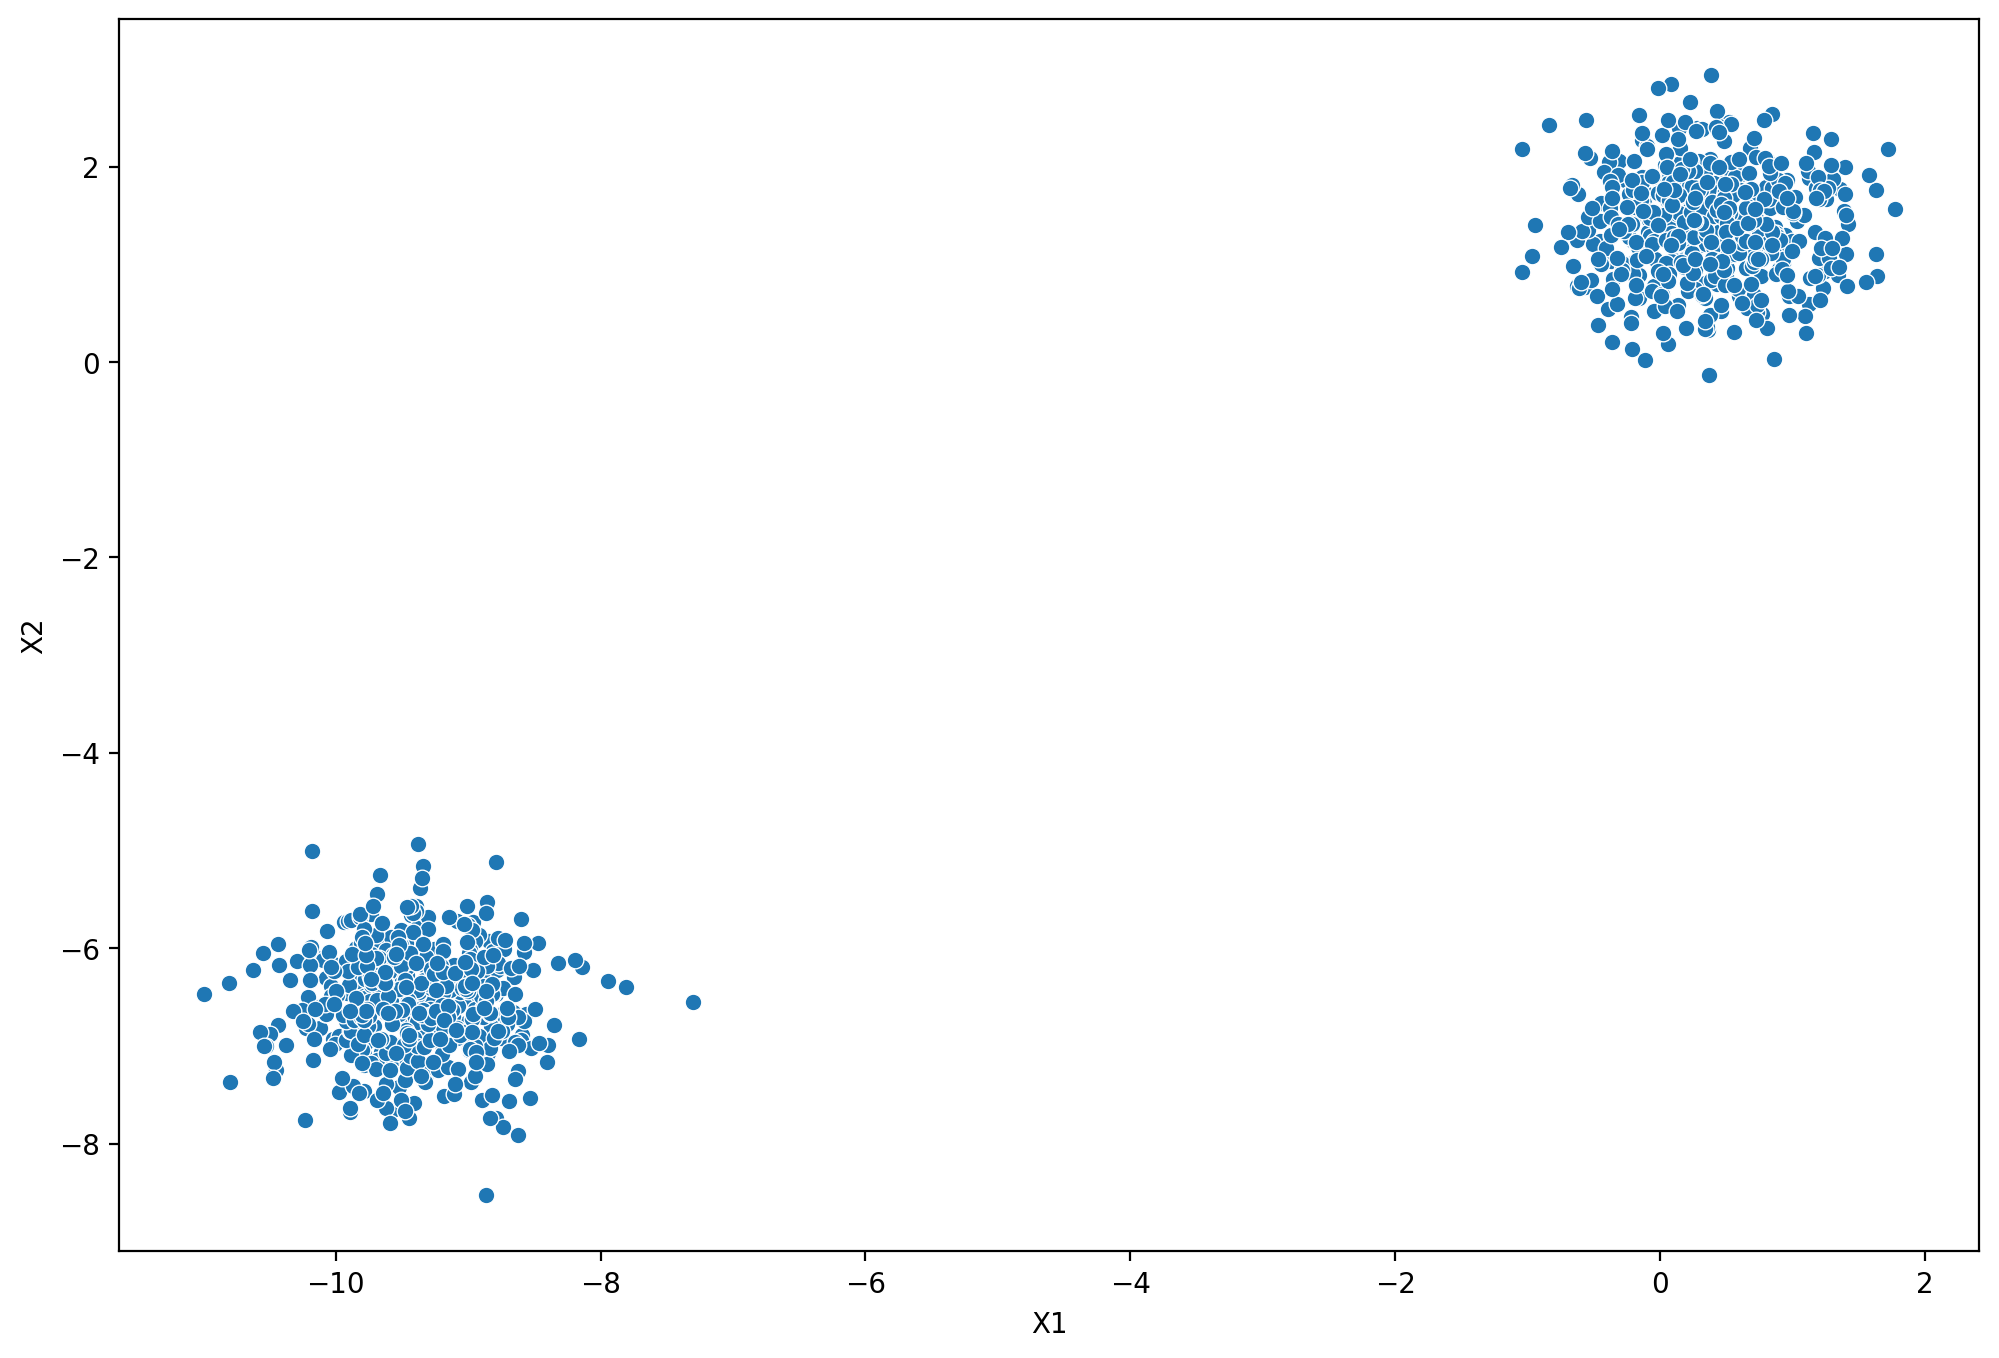

In [8]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=two_blobs, x='X1', y='X2')
plt.show()

In [10]:
two_blobs_outliers = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

In [12]:
two_blobs_outliers.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


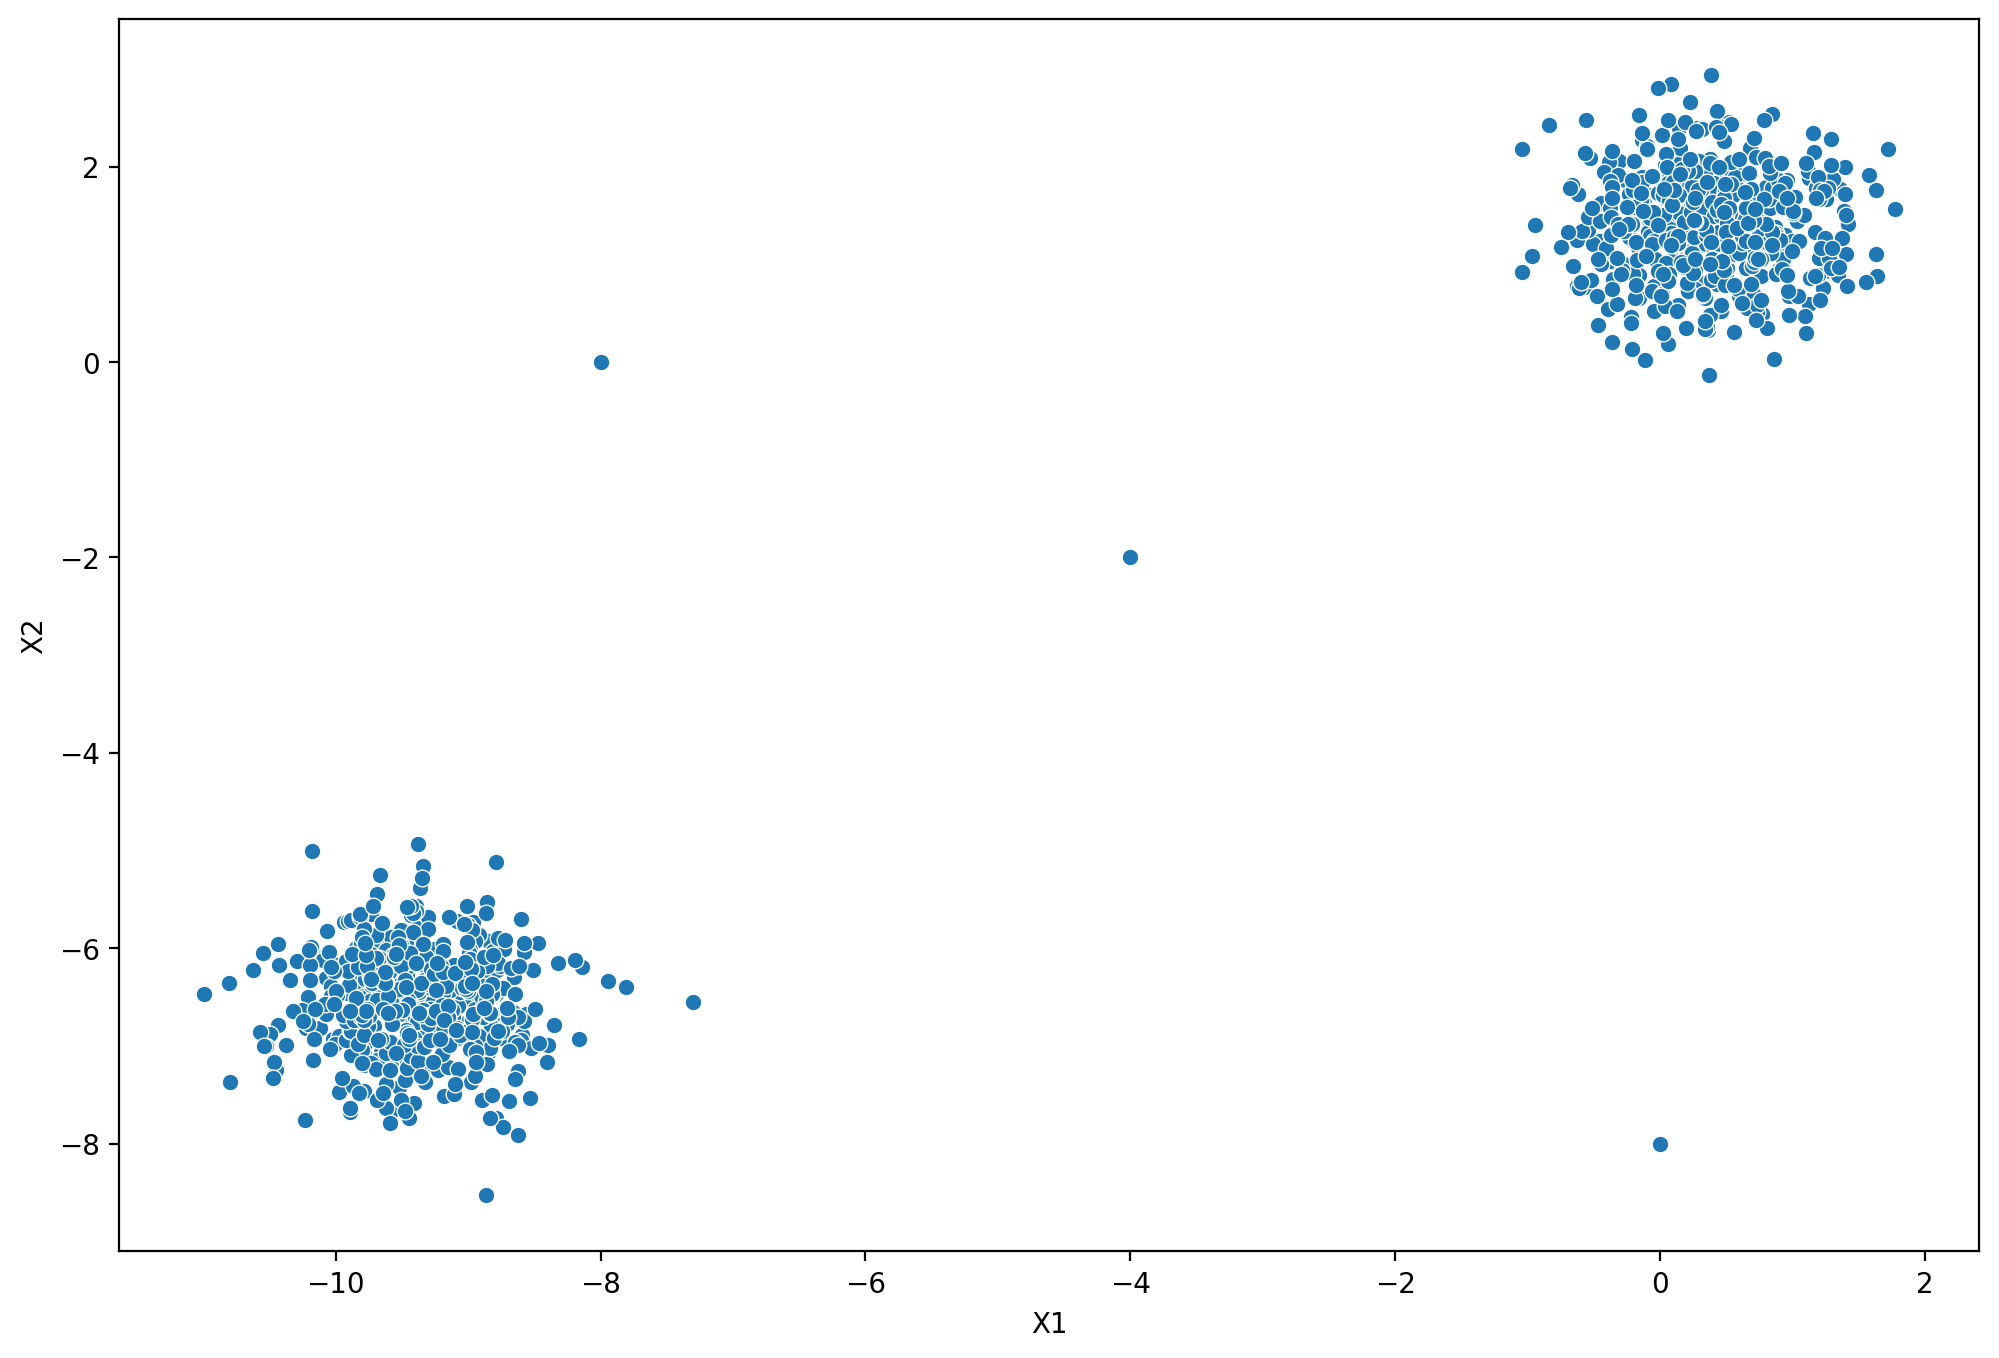

In [14]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')
plt.show()

## "Создаём" целевую переменную с помощью кластеризации (Label Discovery)

In [16]:
def display_categories(model, data):

    labels = model.fit_predict(data)

    plt.figure(figsize=(12, 8), dpi=200)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')
    plt.show()

## DBSCAN

In [18]:
from sklearn.cluster import DBSCAN

In [19]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |
 |  This implementation has a worst case memory complexity of :math:`O({n}^2)`,
 |  which can occur when the `eps` param is large and `min_samples` is low,
 |  while the original DBSCAN only uses linear memory.
 |  For further details, see the Notes below.
 |
 |  Read more in the :ref:`User Guide <dbscan>`.
 |
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in t

In [22]:
dbscan = DBSCAN()

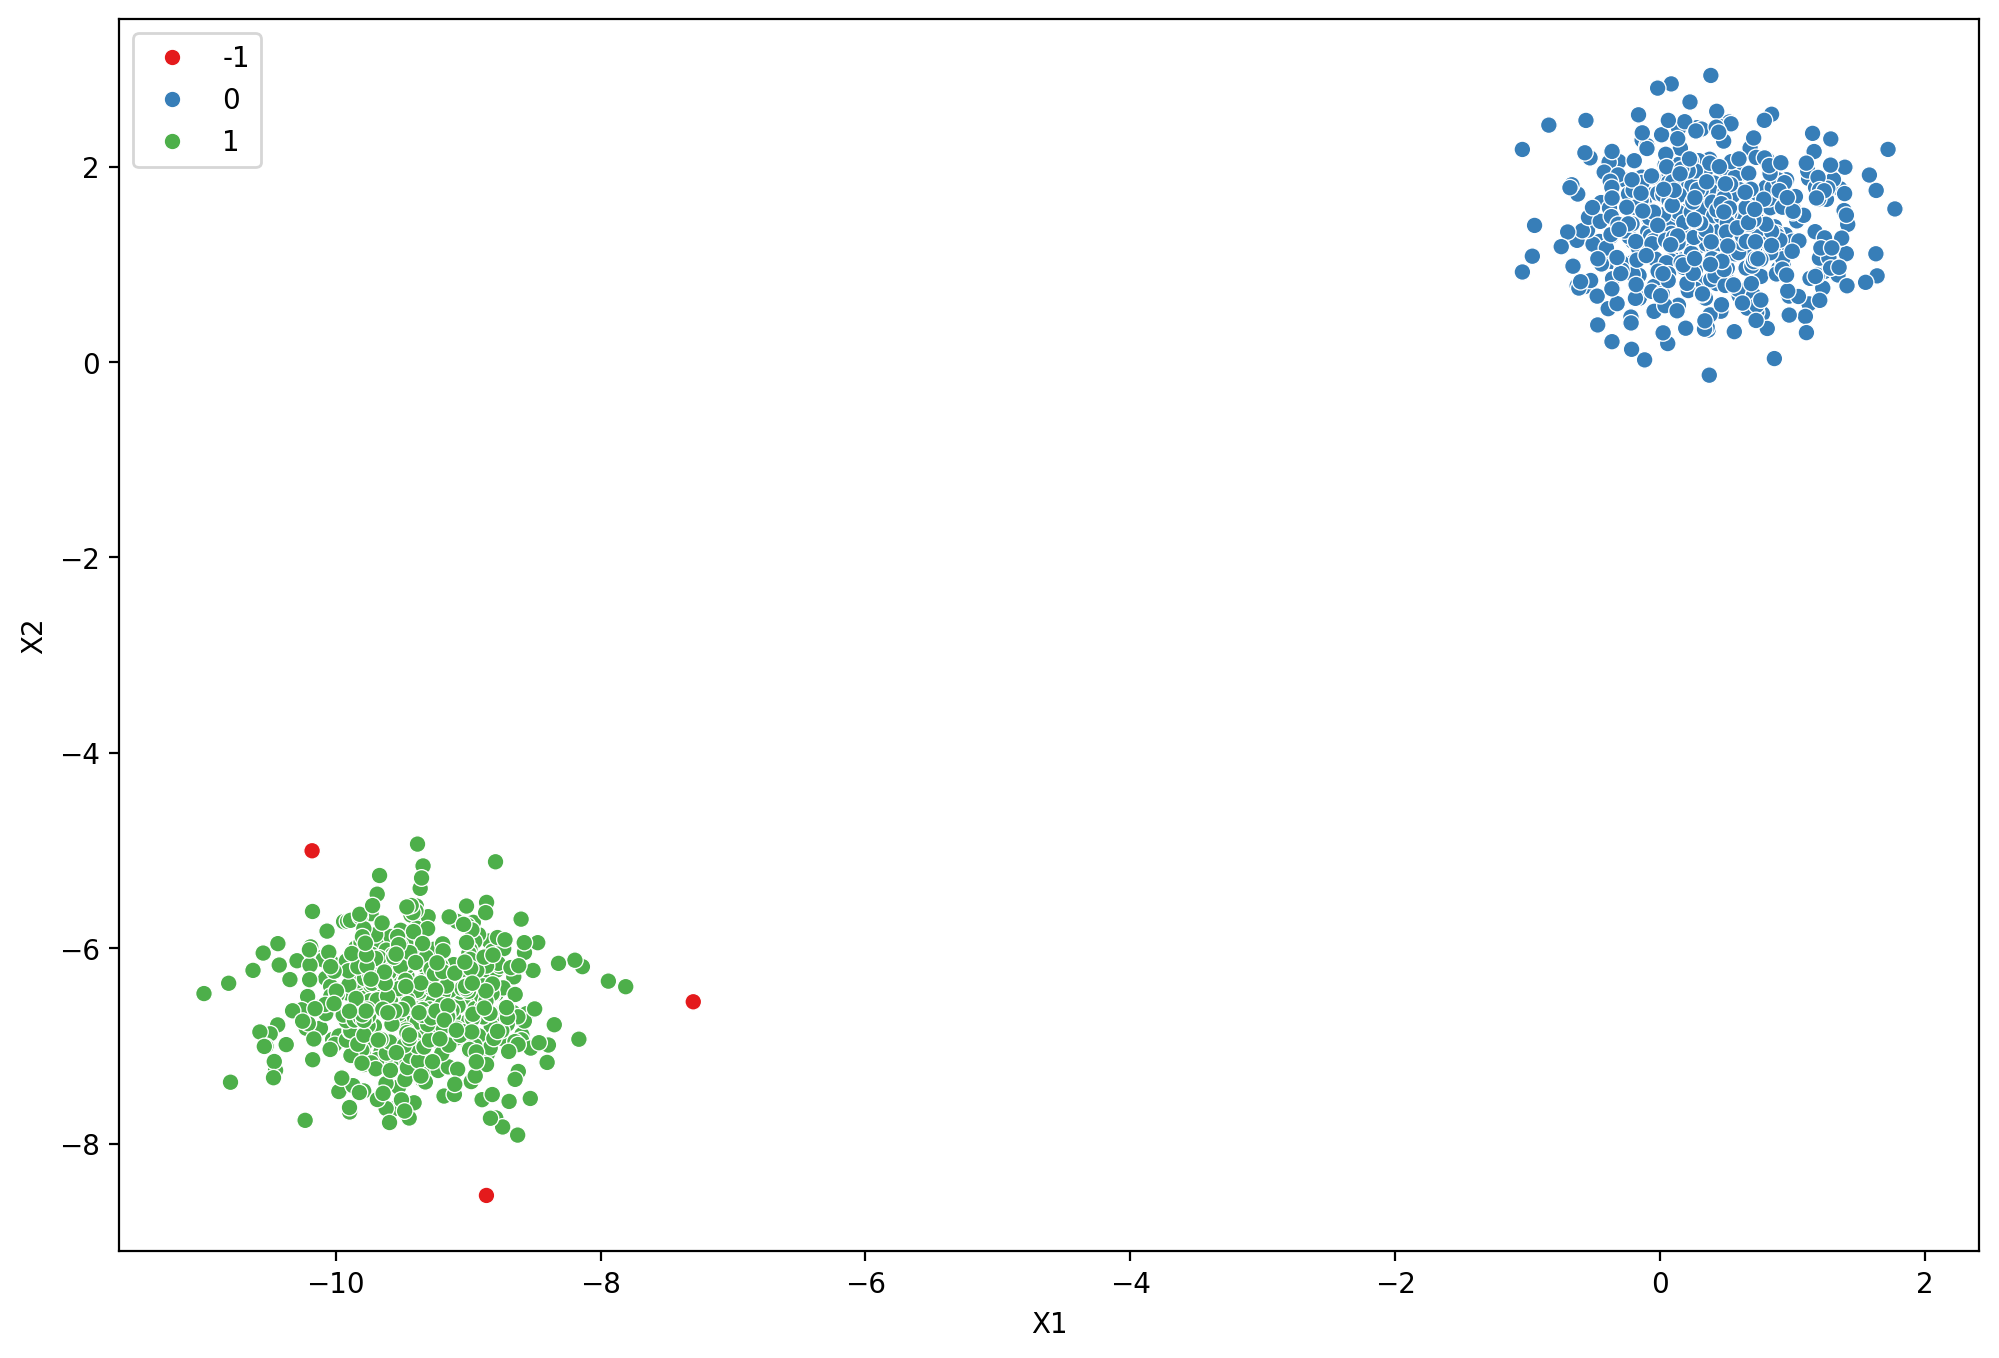

In [24]:
display_categories(dbscan, two_blobs)

Со значениями модели по умолчанию получаем три точки рядом с зелёным кластером, которые обозначены как выбросы.

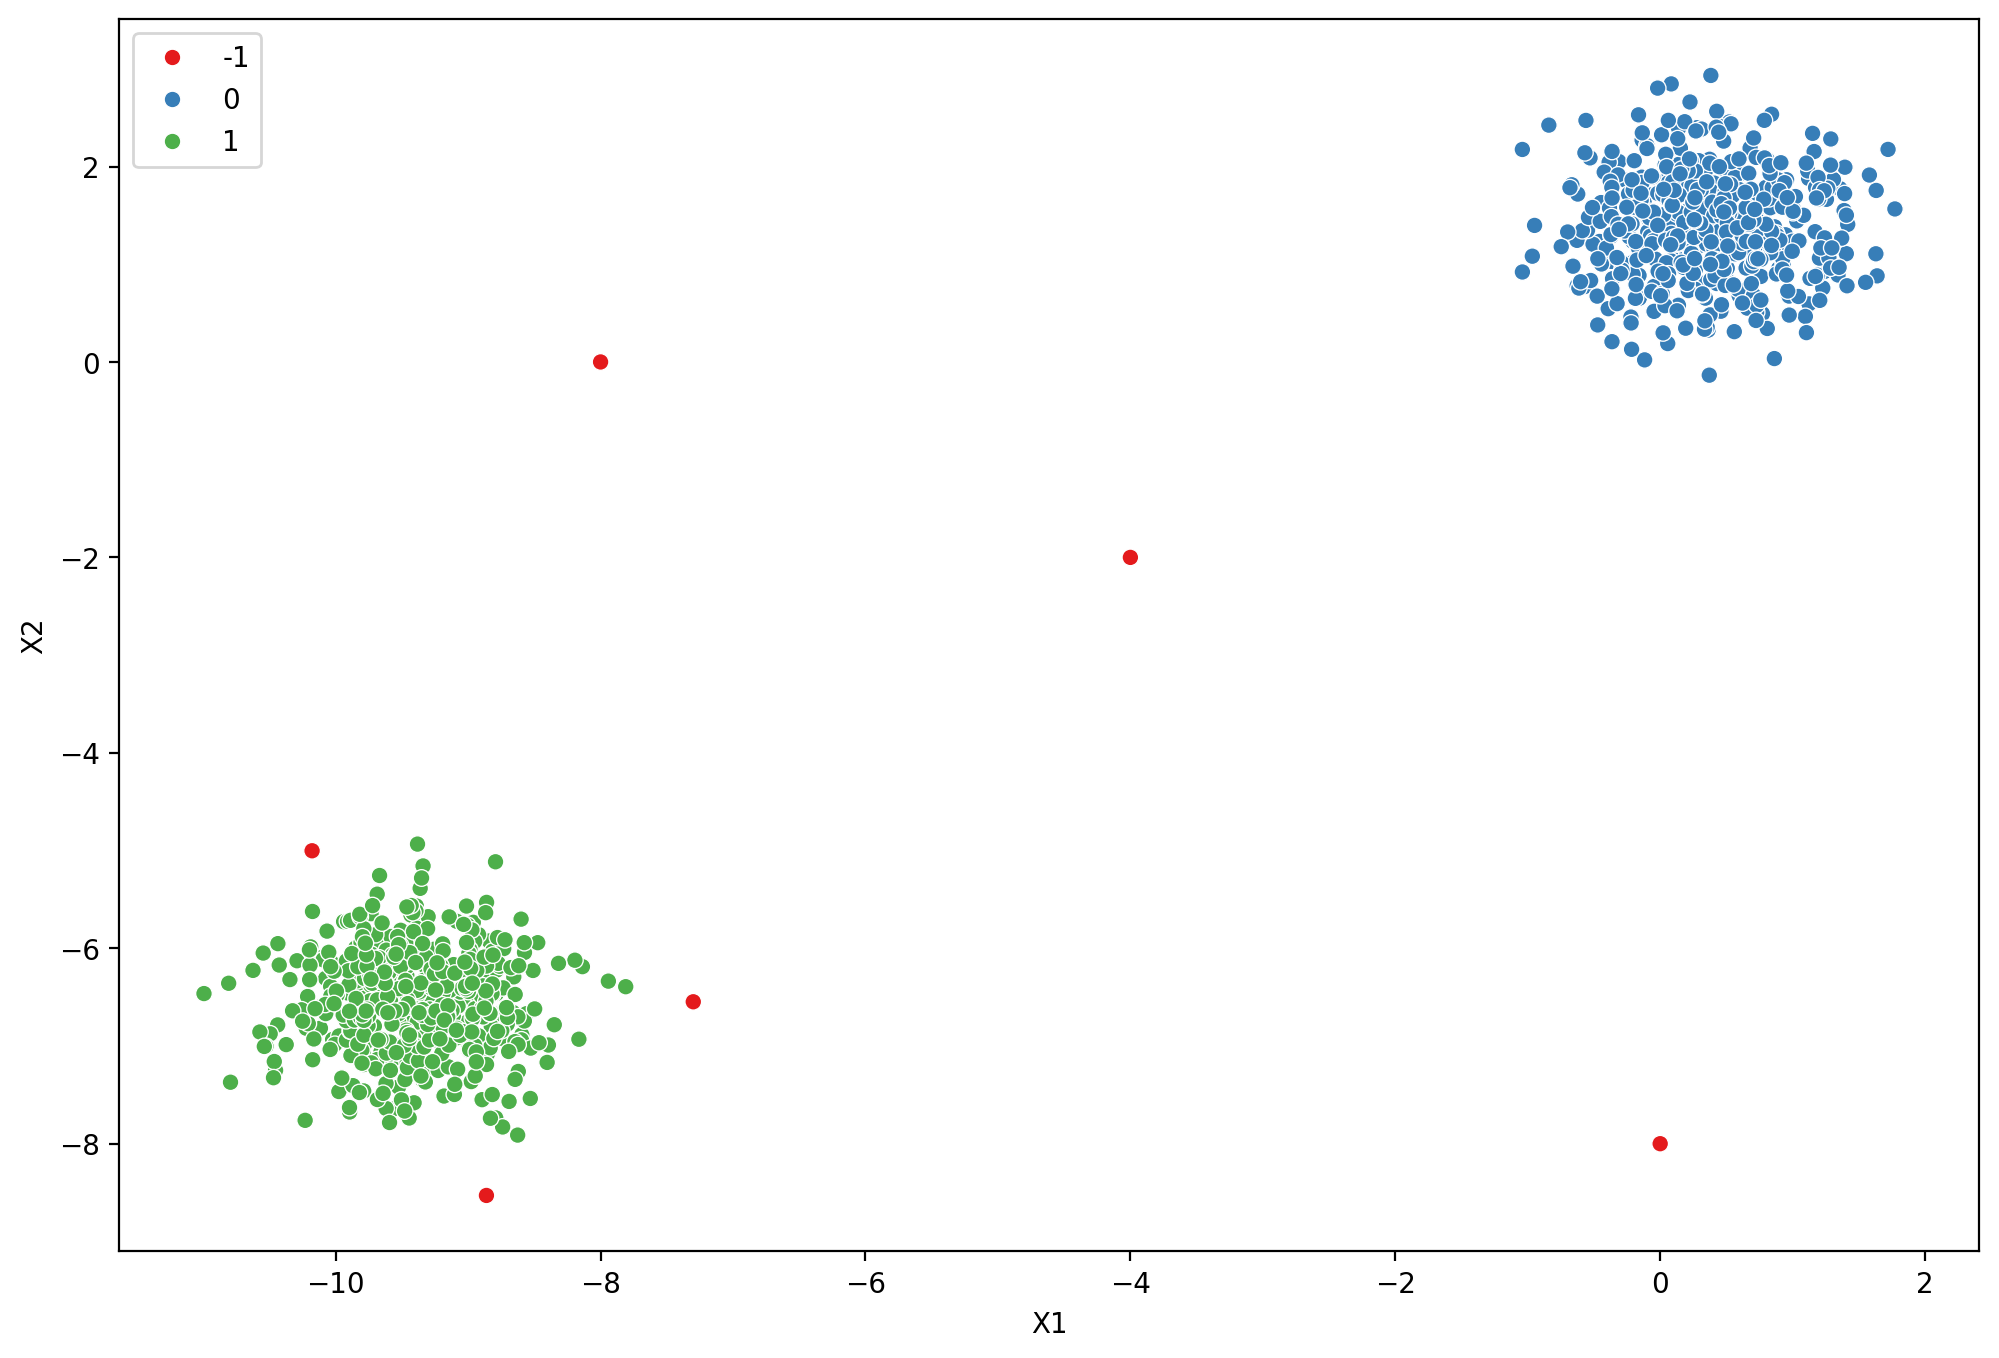

In [26]:
display_categories(dbscan, two_blobs_outliers)

В данном случае, для значений модели по умолчанию получаем шесть точек рядом с зелёным кластером, которые обозначены как выбросы.

# Параметр Эпсилон - Epsilon

    eps : float, default=0.5
     |      The maximum distance between two samples for one to be considered
     |      as in the neighborhood of the other. This is not a maximum bound
     |      on the distances of points within a cluster. This is the most
     |      important DBSCAN parameter to choose appropriately for your data set
     |      and distance function.

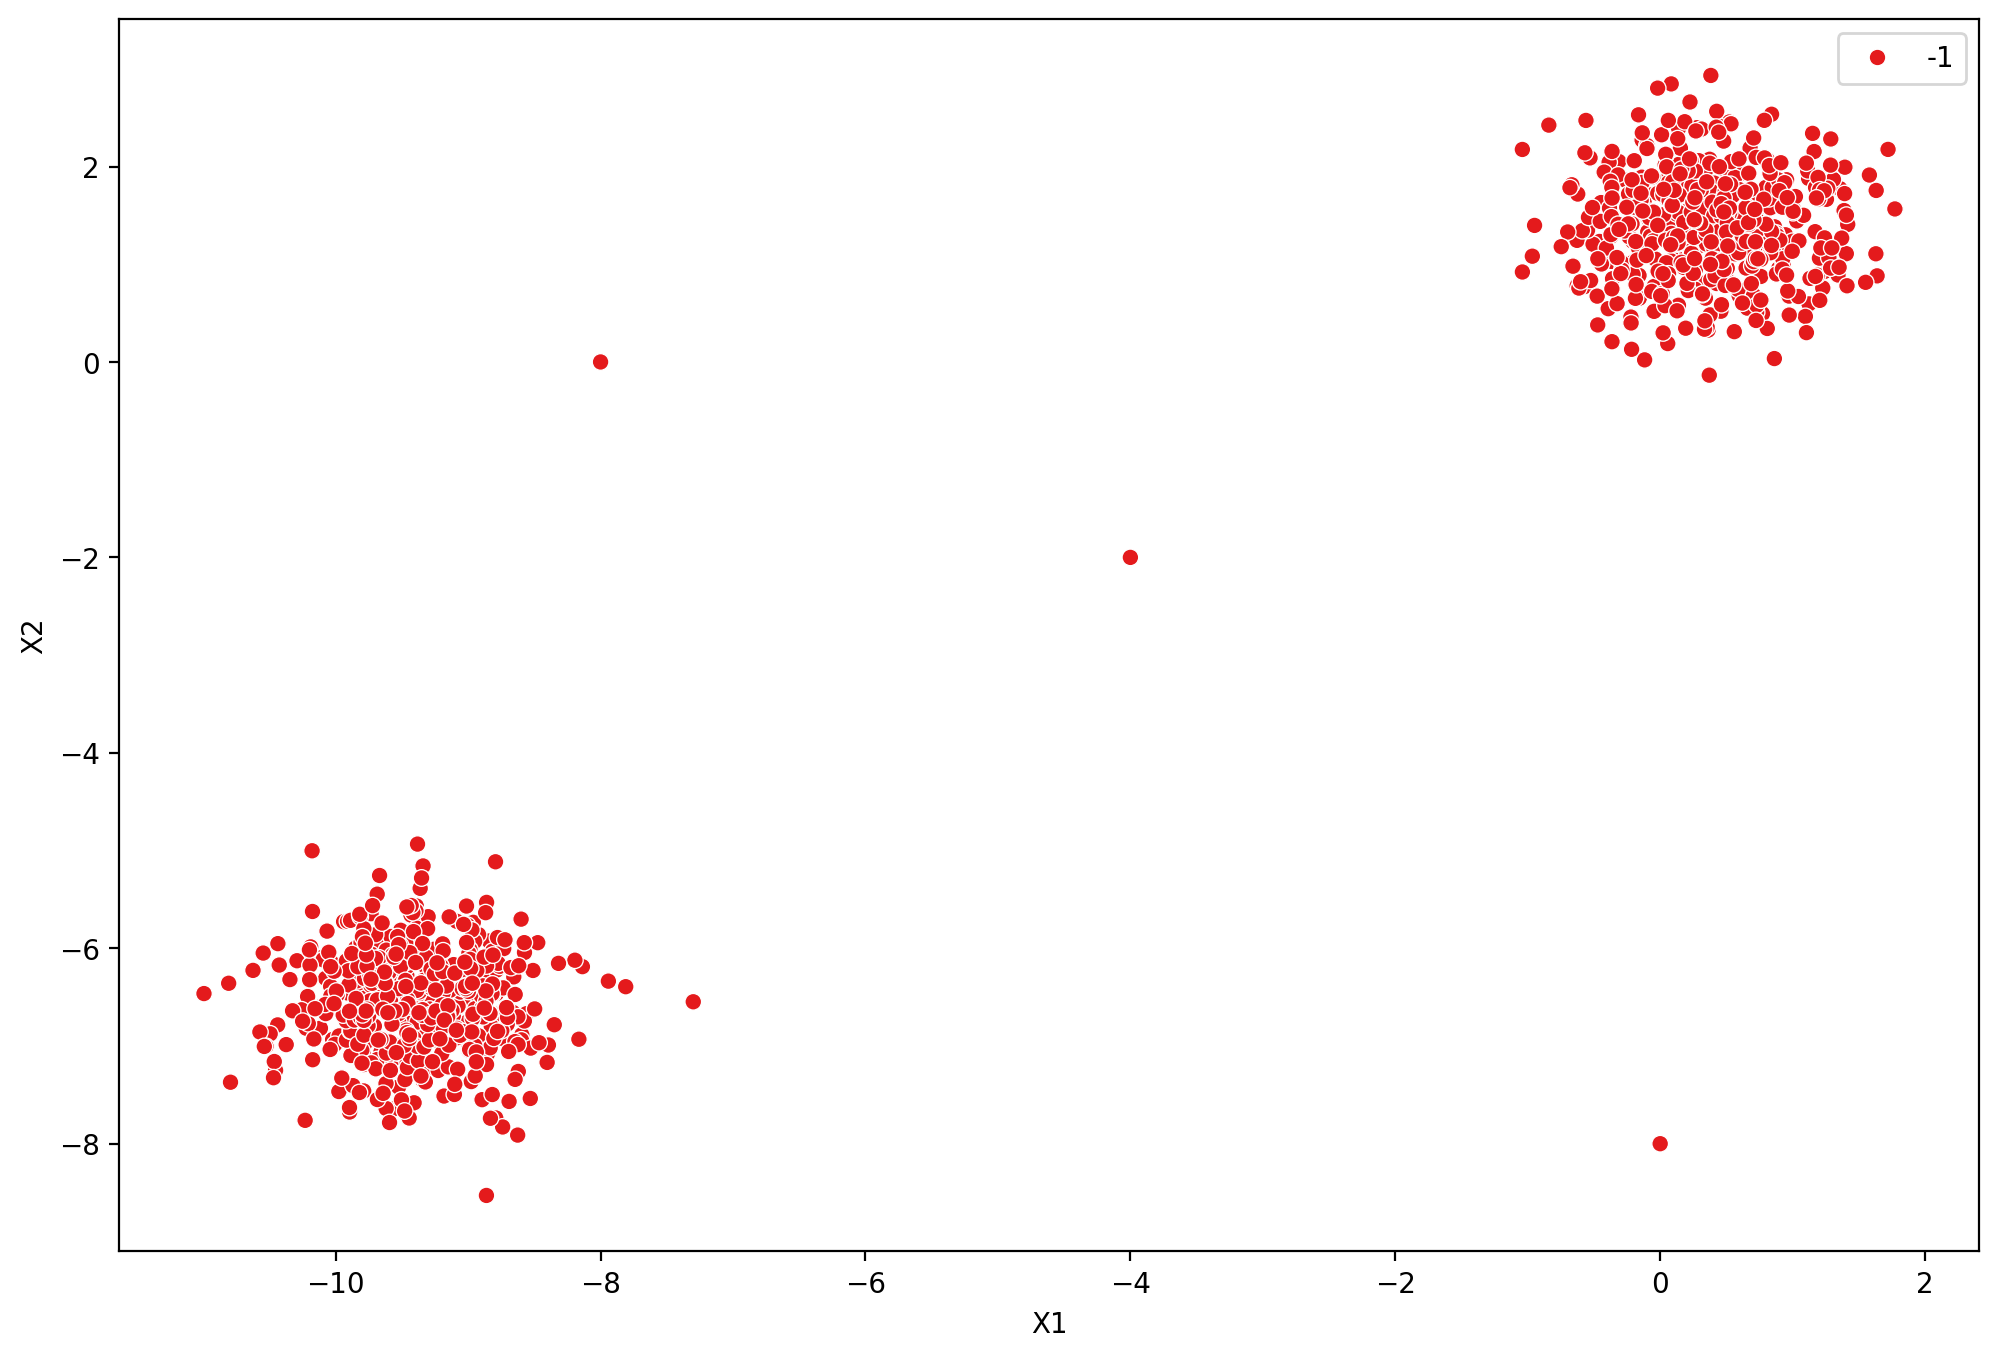

In [28]:
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan, two_blobs_outliers)

**Маленький эпсилон --> Маленькая окрестность вокруг точек --> Все точки являются выбросами (class=-1)**

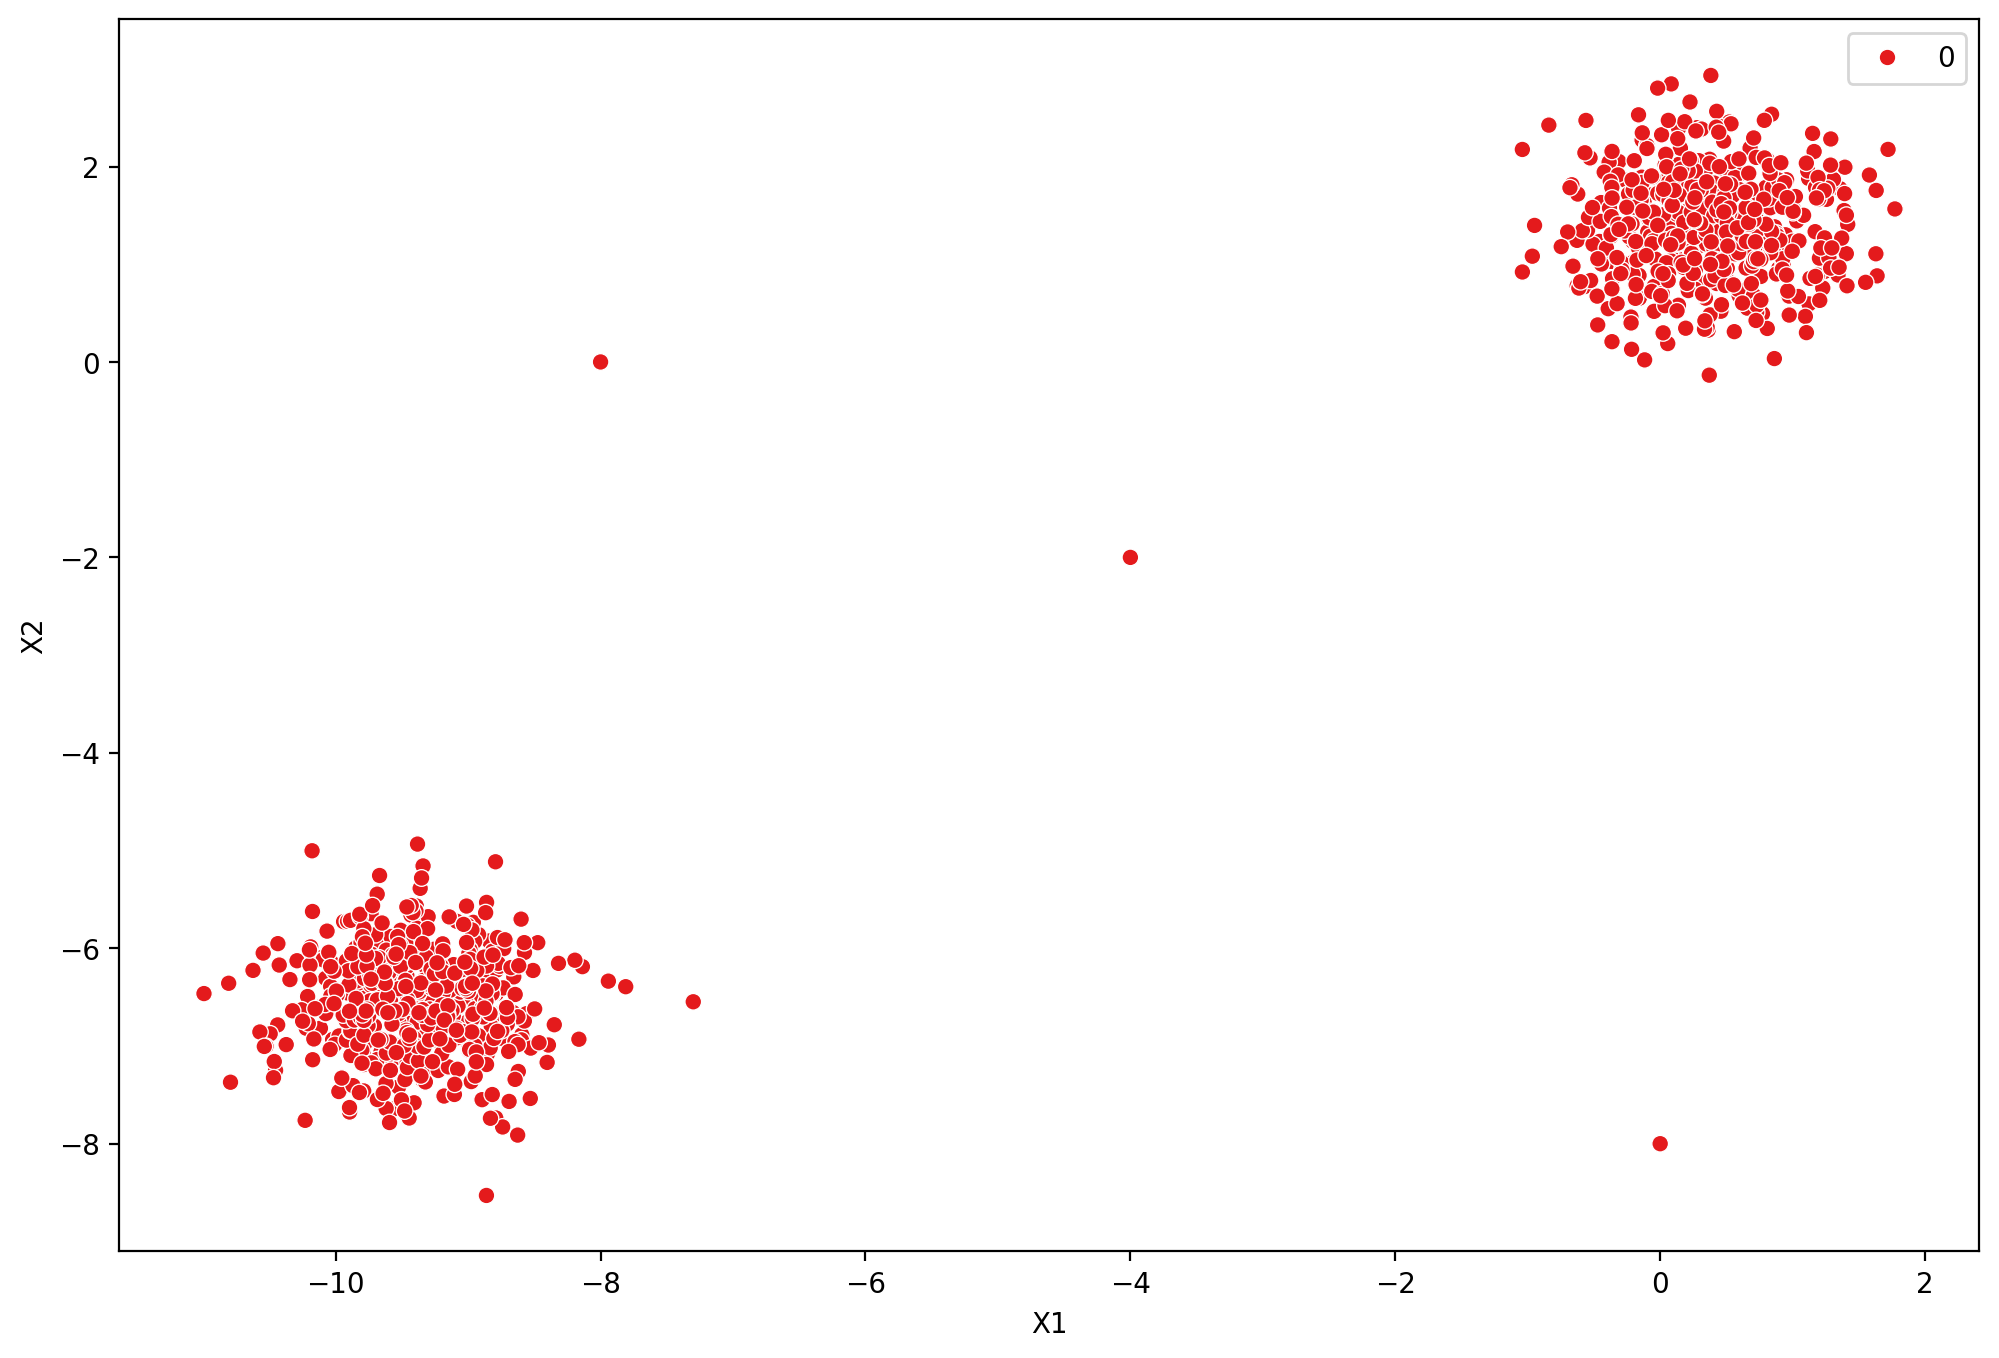

In [31]:
dbscan = DBSCAN(eps=10)
display_categories(dbscan, two_blobs_outliers)

**Огромный эпсилон --> Большие окрестности точек --> Все точки в одном кластере (class=0)**

### Как найти хорошее значение эпсилон?

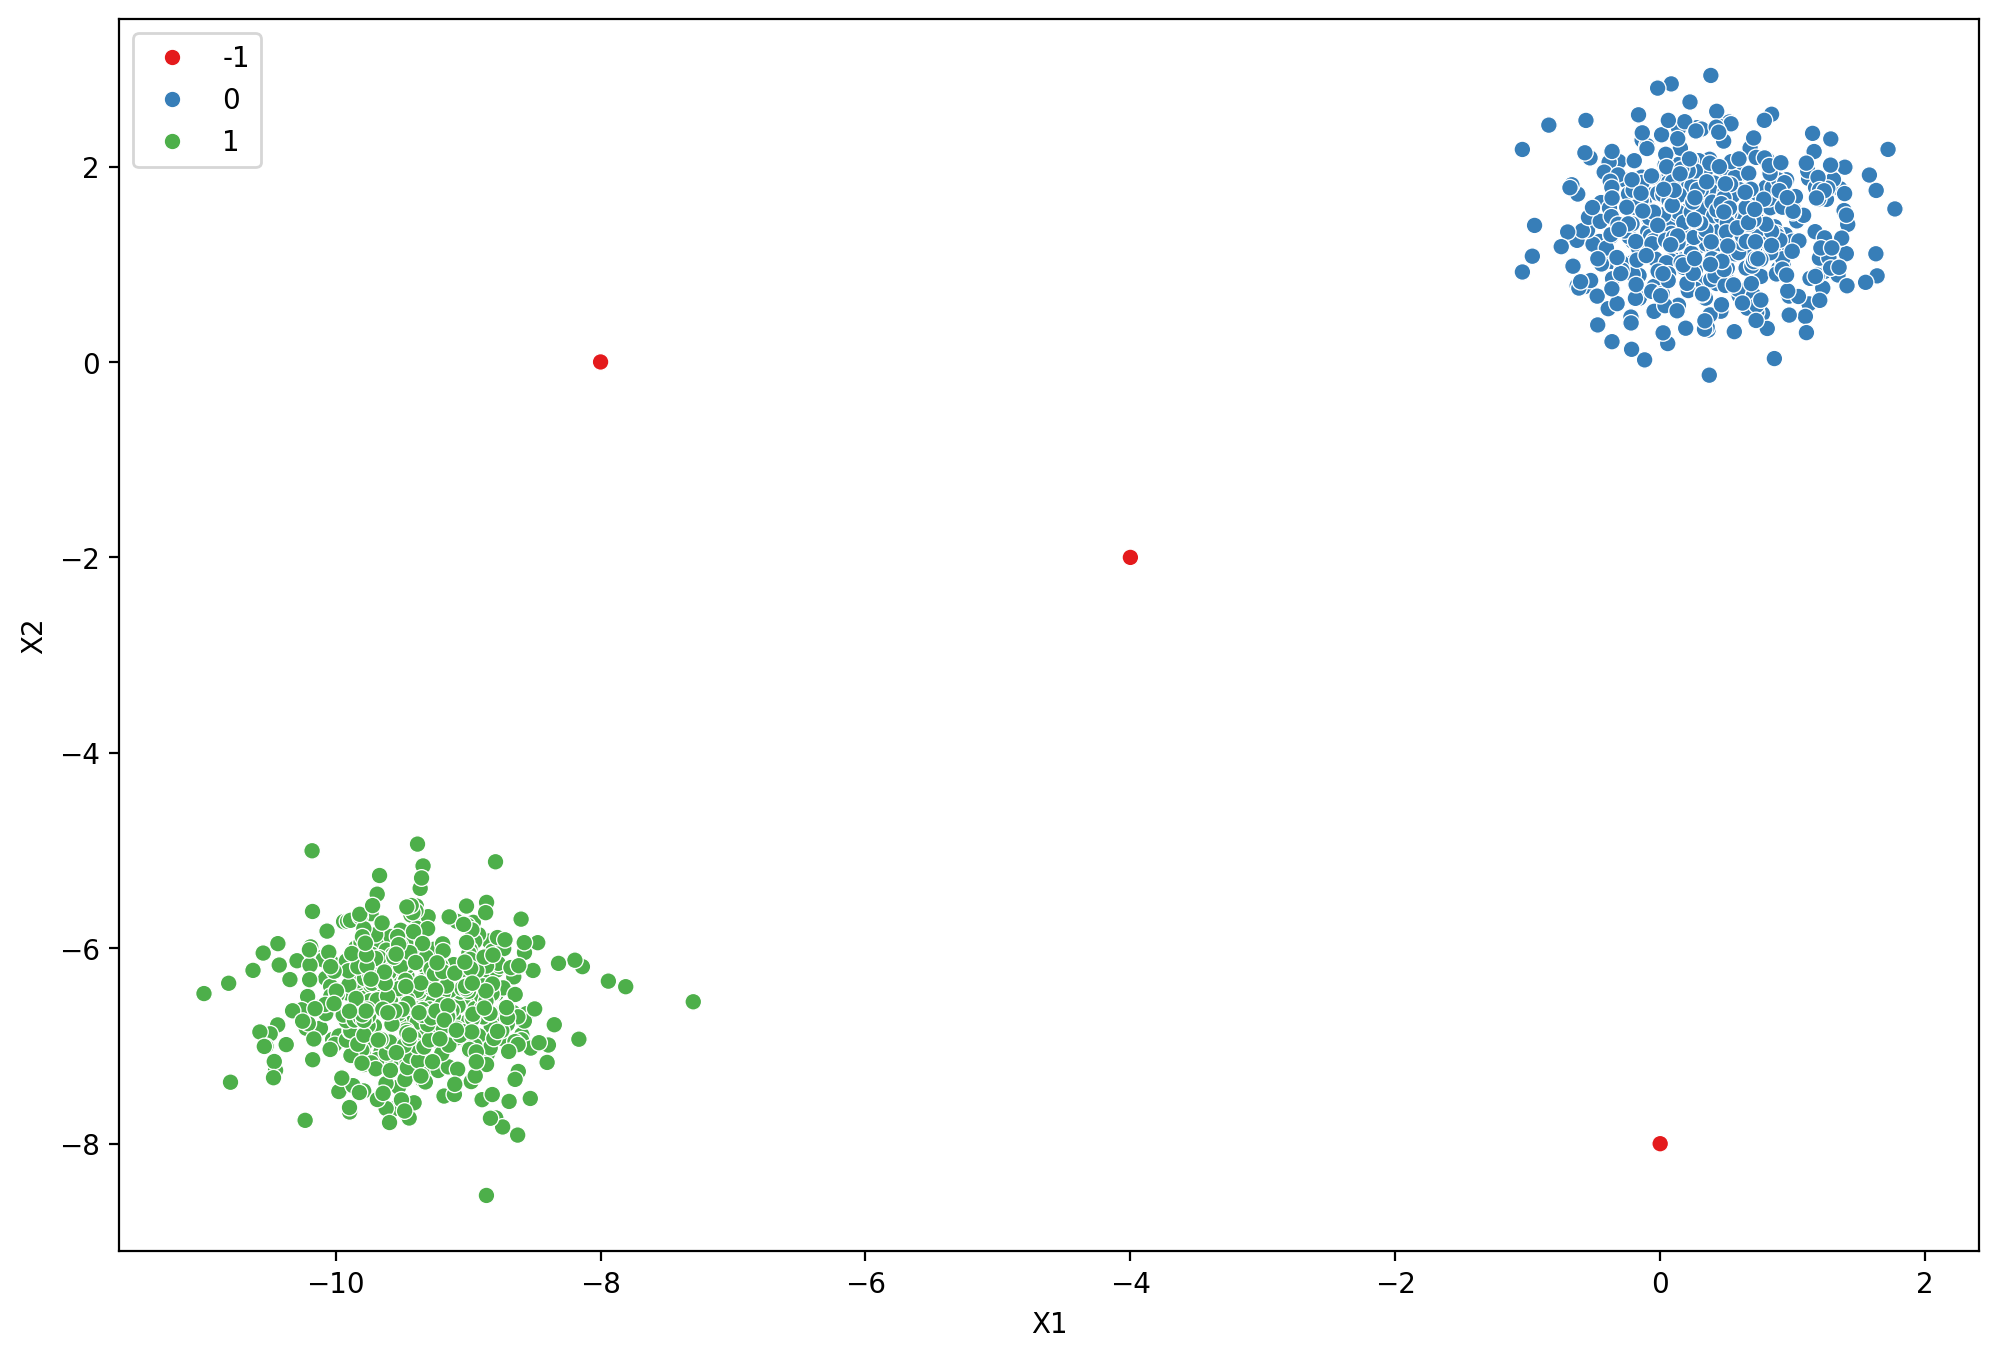

In [36]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan, two_blobs_outliers)

Теперь получим значения кластеров для точек

In [39]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1])

In [41]:
dbscan.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

Можно посчитать сколько получилось точек выбросов

In [46]:
np.sum(dbscan.labels_ == -1)

np.int64(3)

Теперь посчитаем процент таких точек

In [49]:
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

np.float64(0.29910269192422734)

Общее количество точек можно найти следующим образом

In [52]:
len(dbscan.labels_)

1003

Общее количество кластеров можно найти следующим образом

In [57]:
np.unique(dbscan.labels_)

array([-1,  0,  1])

In [59]:
len(np.unique(dbscan.labels_))

3

## Рисуем график для различных значений эпсилон

Применение метода "локтя" (elbow) / "колена" (knee): https://raghavan.usc.edu/papers/kneedle-simplex11.pdf

In [64]:
outlier_percent = []
number_of_outliers = []

# Укажем экстримально широкий диапазон для того,
# чтобы посмотреть как это будет работать.
# По-хорошему, надо сделать его меньше
for eps in np.linspace(0.001, 10, 100):
    
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)

    # Количество выбросов
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))

    # Процент выбросов
    percent_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(percent_outliers)

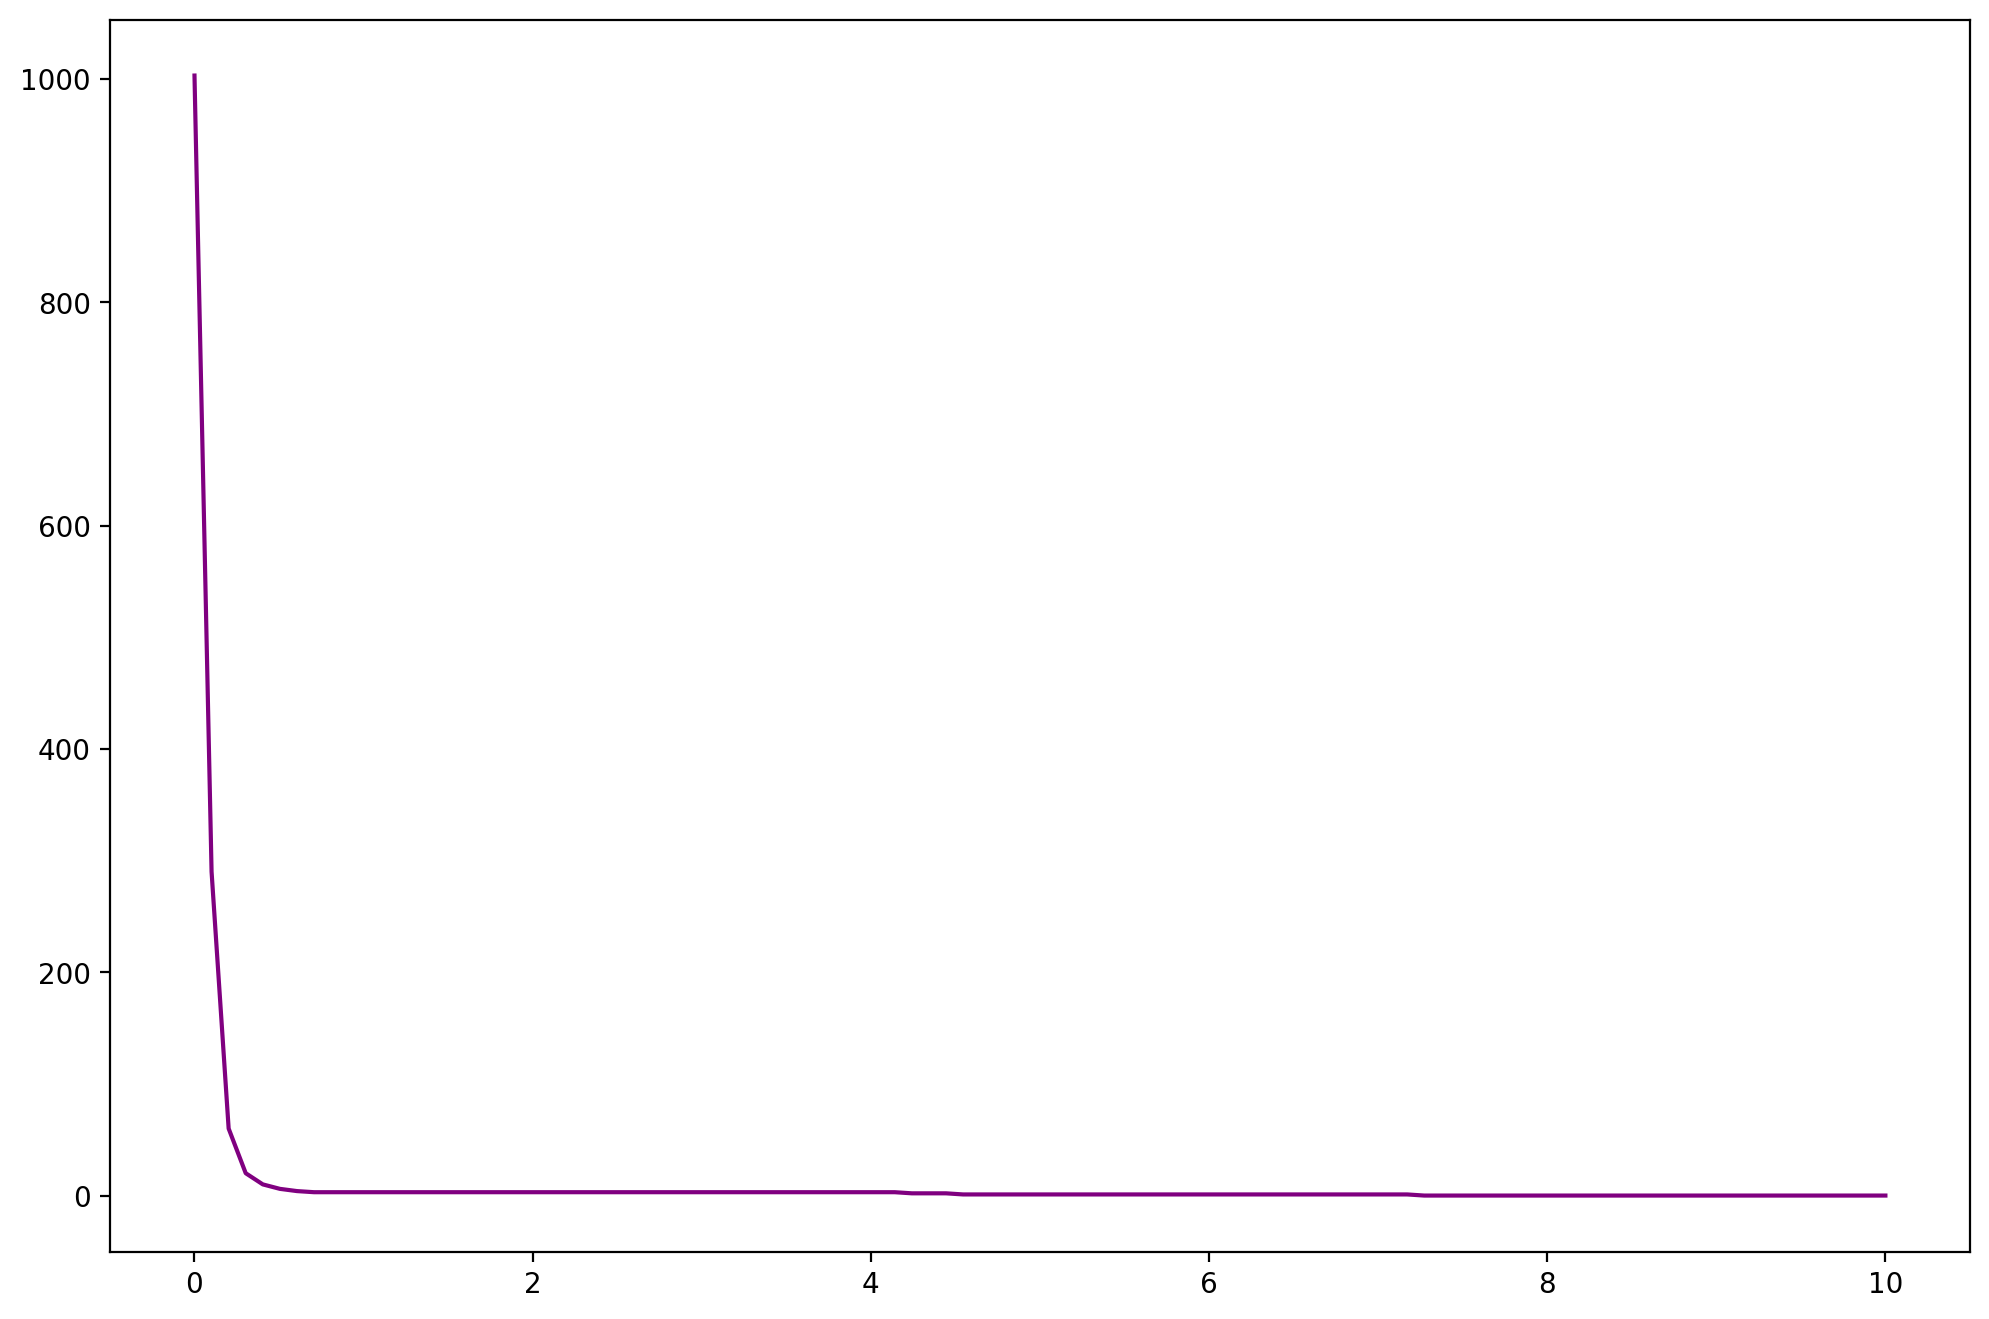

In [66]:
plt.figure(figsize=(12, 8), dpi=200)
sns.lineplot(x=np.linspace(0.001, 10, 100), y=number_of_outliers, c='purple')
plt.show()

На основе такого графика можно выбрать значение $\varepsilon$. Здесь нас интересует та область графика, где он переходит от резкого падения, на некоторое горизонтальное плато. 

Для больших значений $\varepsilon$, на этом графике видно нулевое количество выбросов.

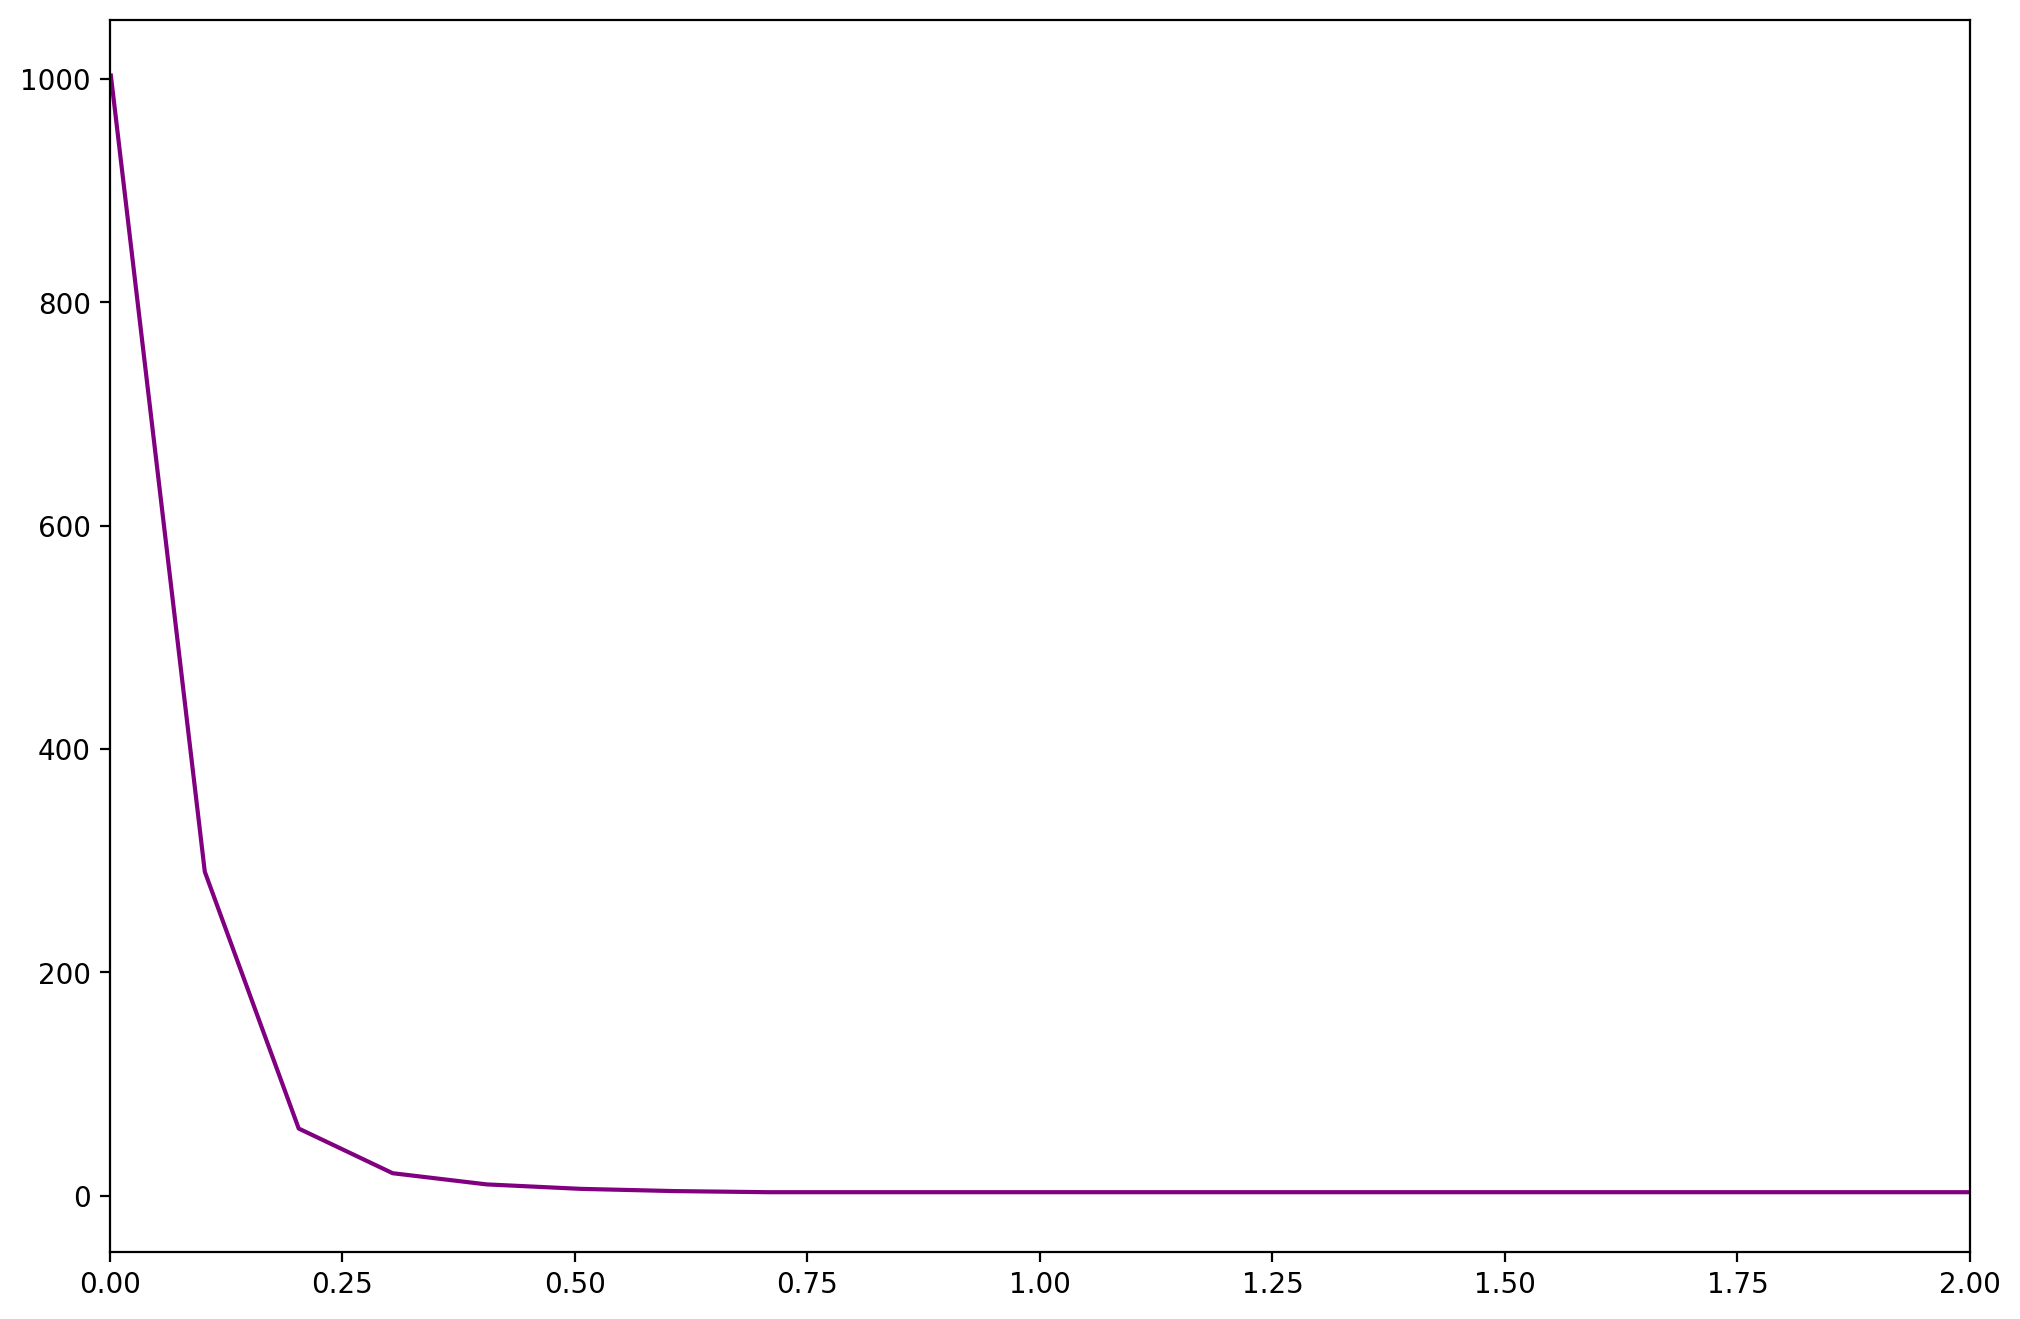

In [70]:
plt.figure(figsize=(12, 8), dpi=200)
sns.lineplot(x=np.linspace(0.001, 10, 100), y=number_of_outliers, c='purple')
plt.xlim(0, 2)
plt.show()

In [73]:
outlier_percent = []
number_of_outliers = []

# Укажем экстримально широкий диапазон для того,
# чтобы посмотреть как это будет работать.
# По-хорошему, надо сделать его меньше
for eps in np.linspace(0.001, 7, 200):
    
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)

    # Количество выбросов
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))

    # Процент выбросов
    percent_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(percent_outliers)

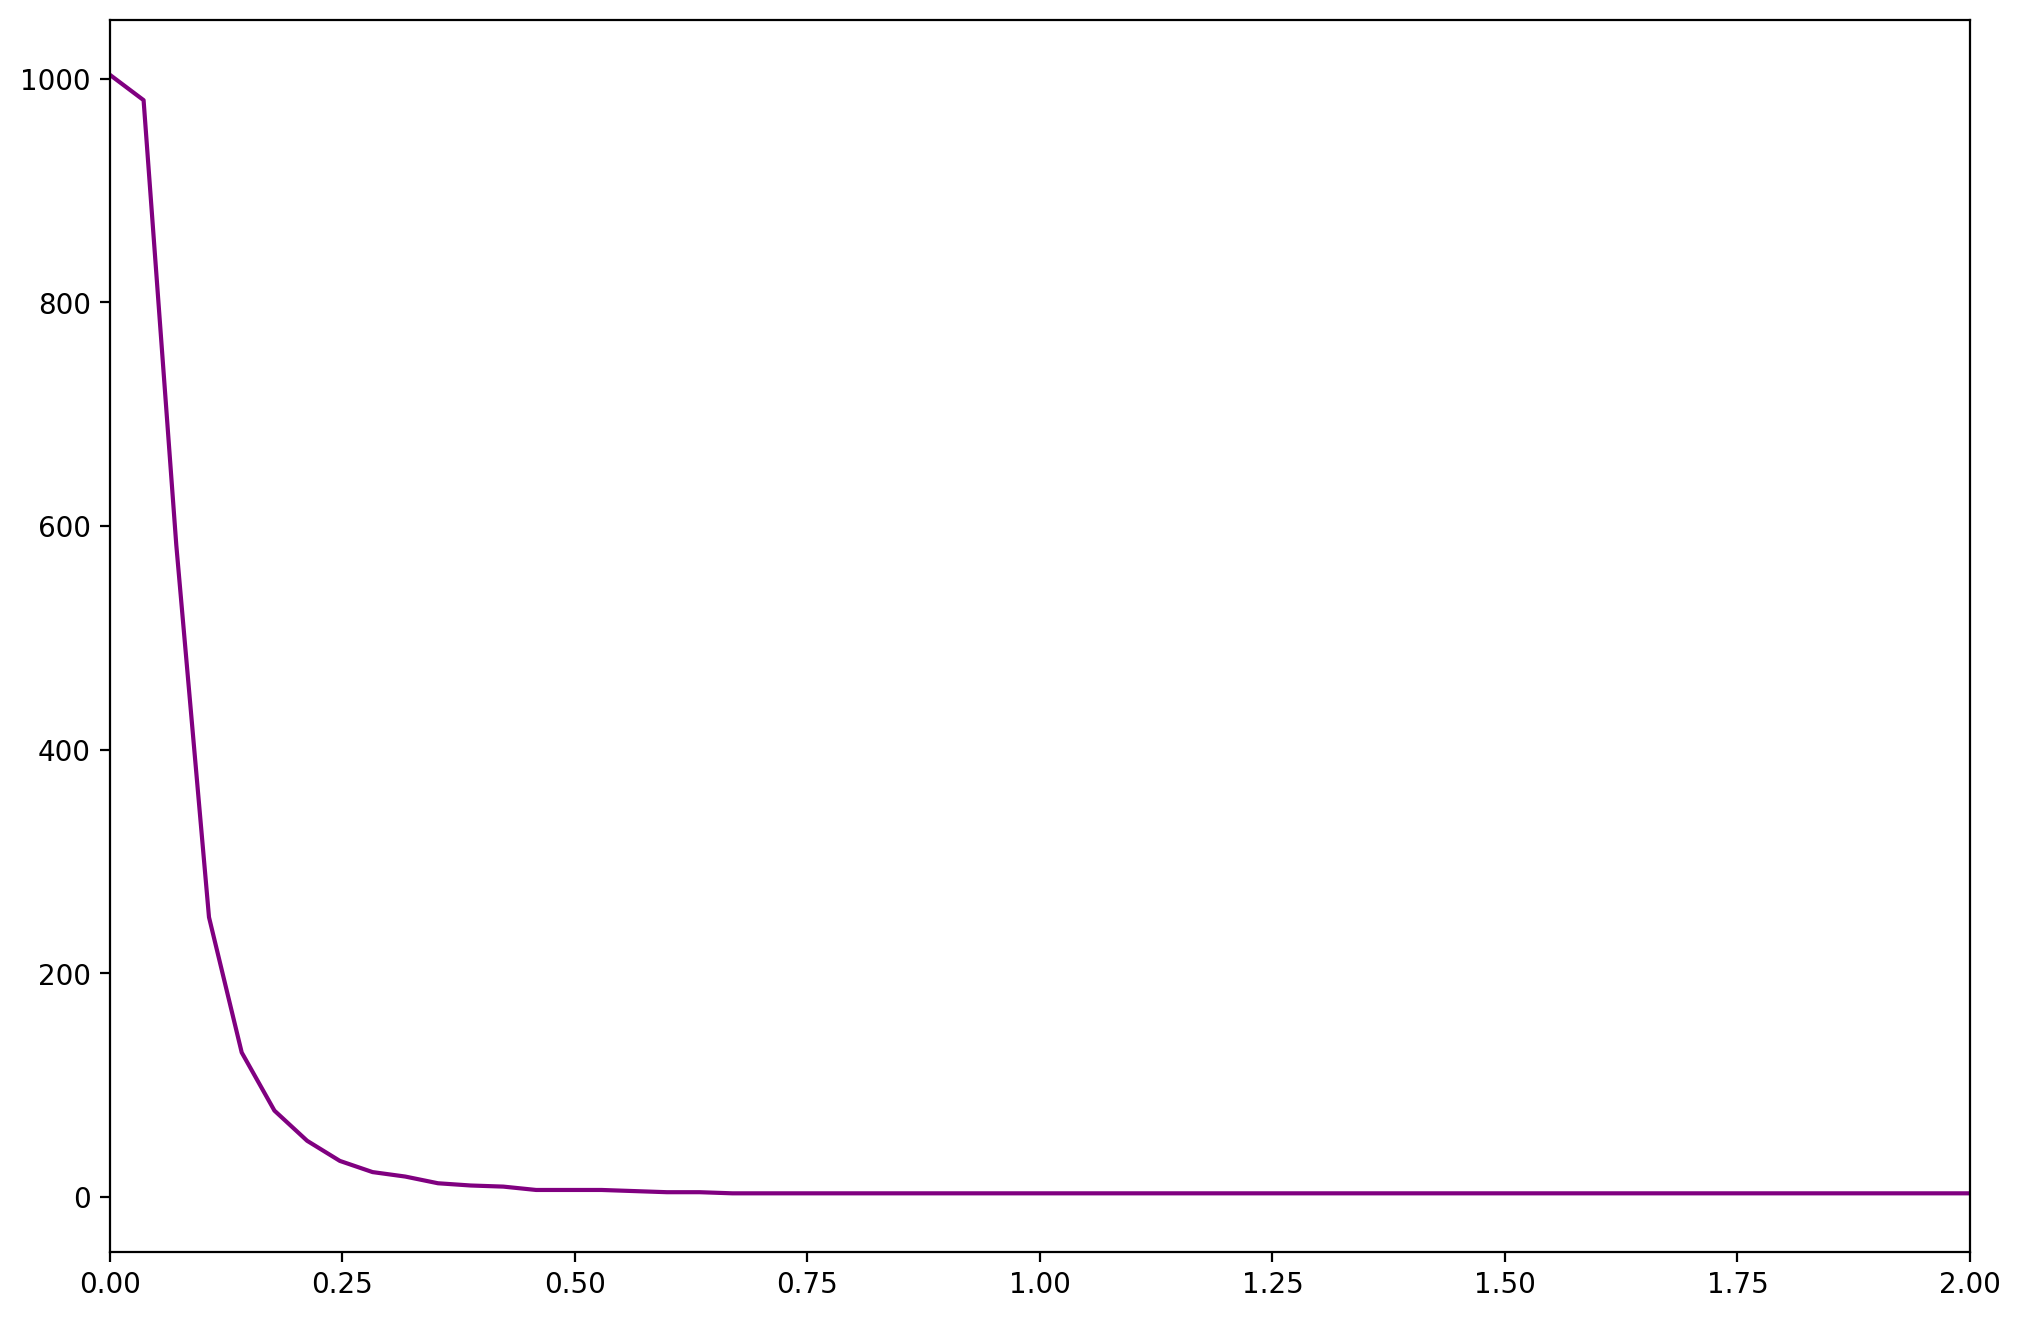

In [75]:
plt.figure(figsize=(12, 8), dpi=200)
sns.lineplot(x=np.linspace(0.001, 7, 200), y=number_of_outliers, c='purple')
plt.xlim(0, 2)
plt.show()

## Если мы работаем с процентами выбросов
В этом случае мы выбираем некоторый "допустимый" процент выбросов, например 1%-5% выбросов.

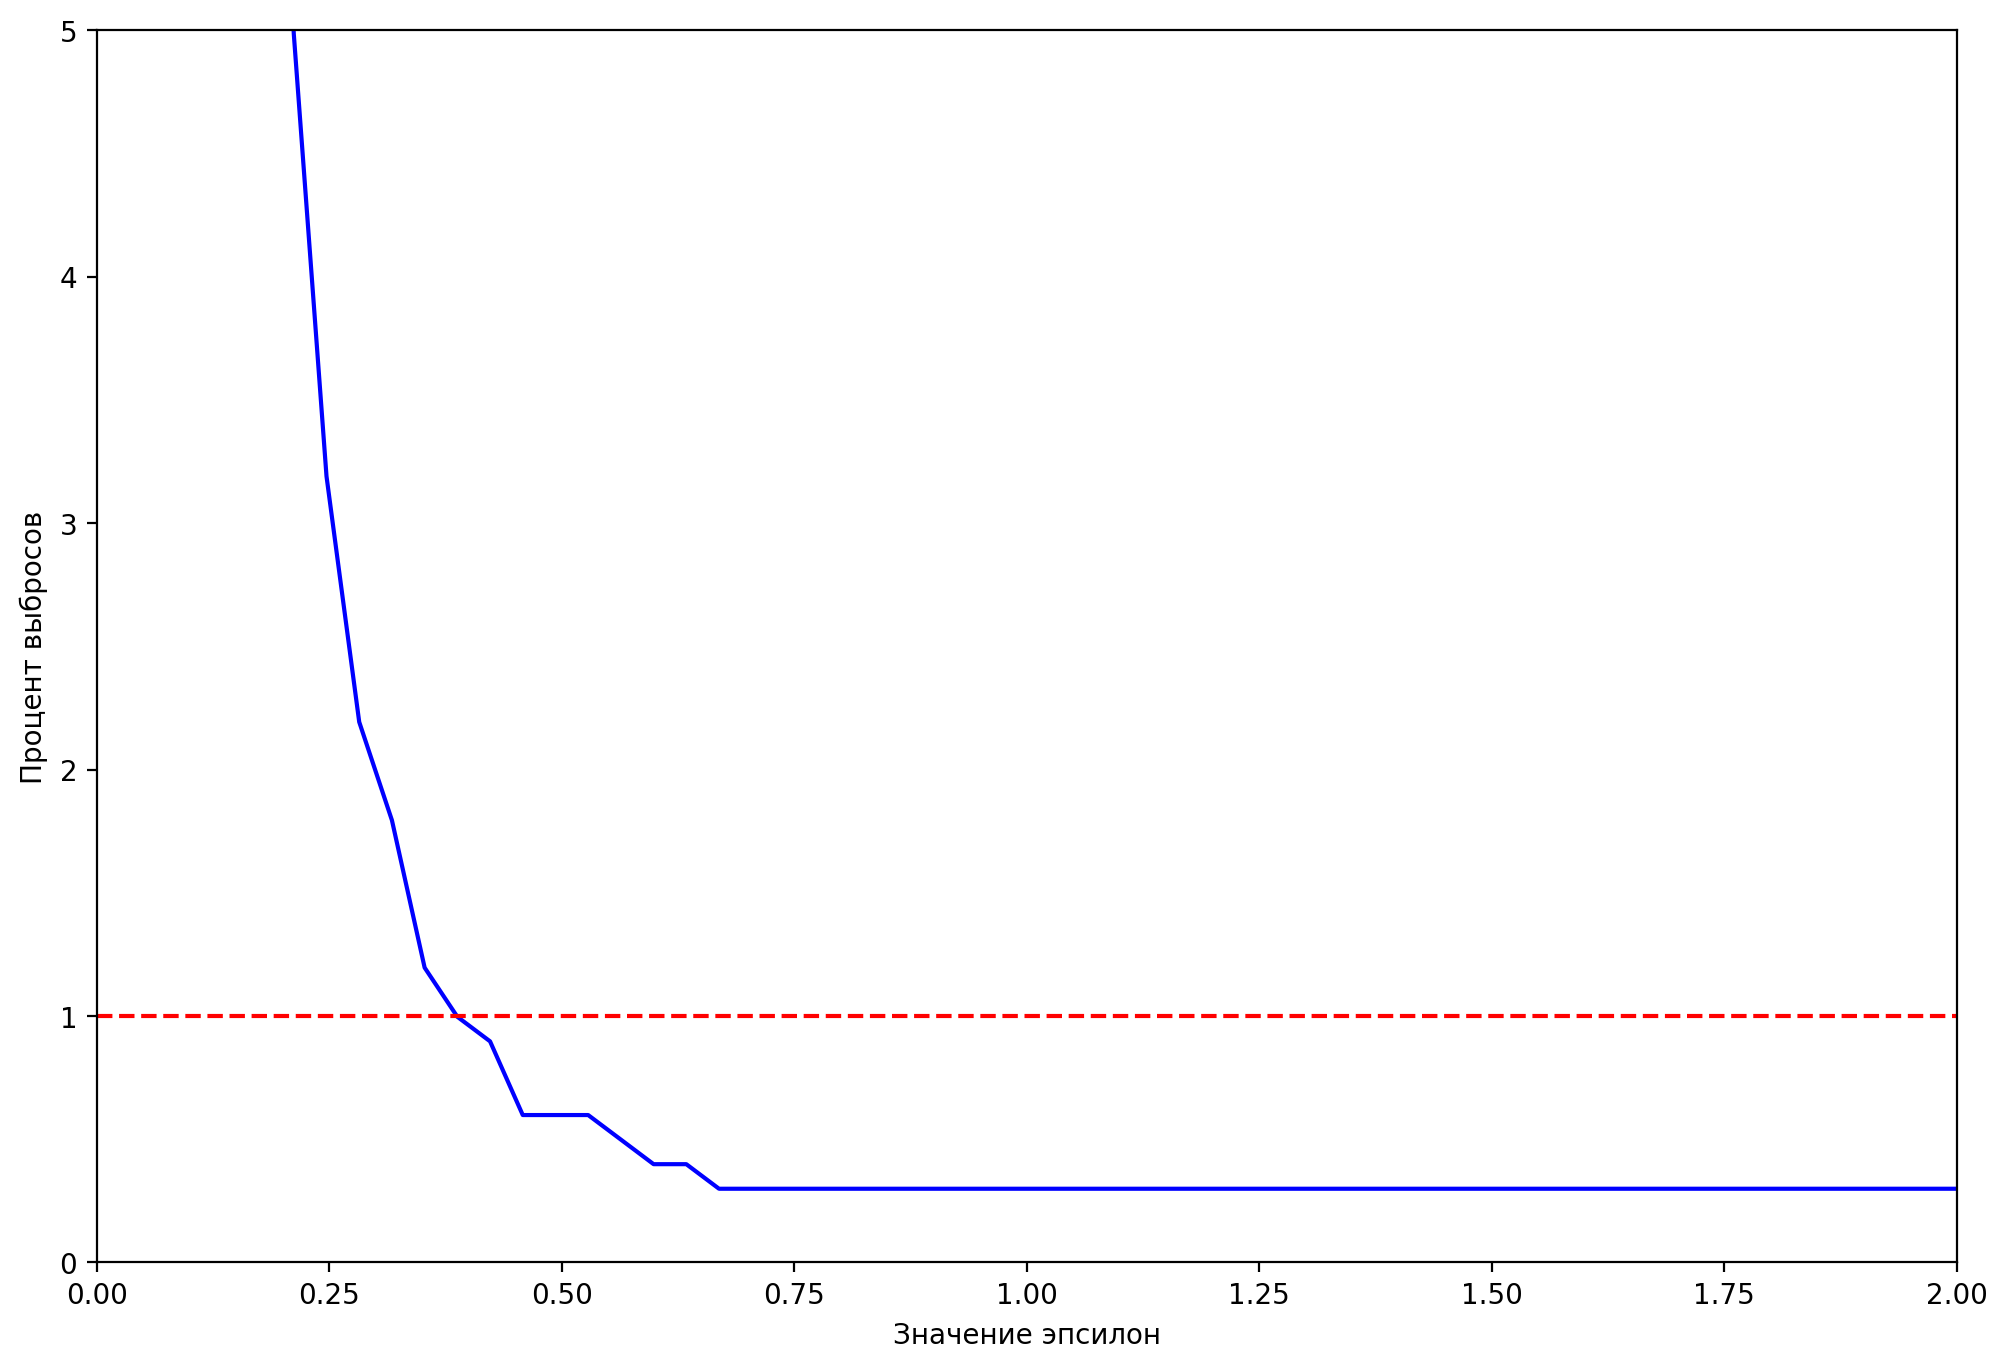

In [97]:
plt.figure(figsize=(12, 8), dpi=200)
sns.lineplot(x=np.linspace(0.001, 7, 200), y=outlier_percent, c='blue')
plt.xlim(0, 2)
plt.ylim(0, 5)
plt.hlines(y=1, xmin=0, xmax=2, color='red', ls='--')
plt.xlabel('Значение эпсилон')
plt.ylabel('Процент выбросов')
plt.show()

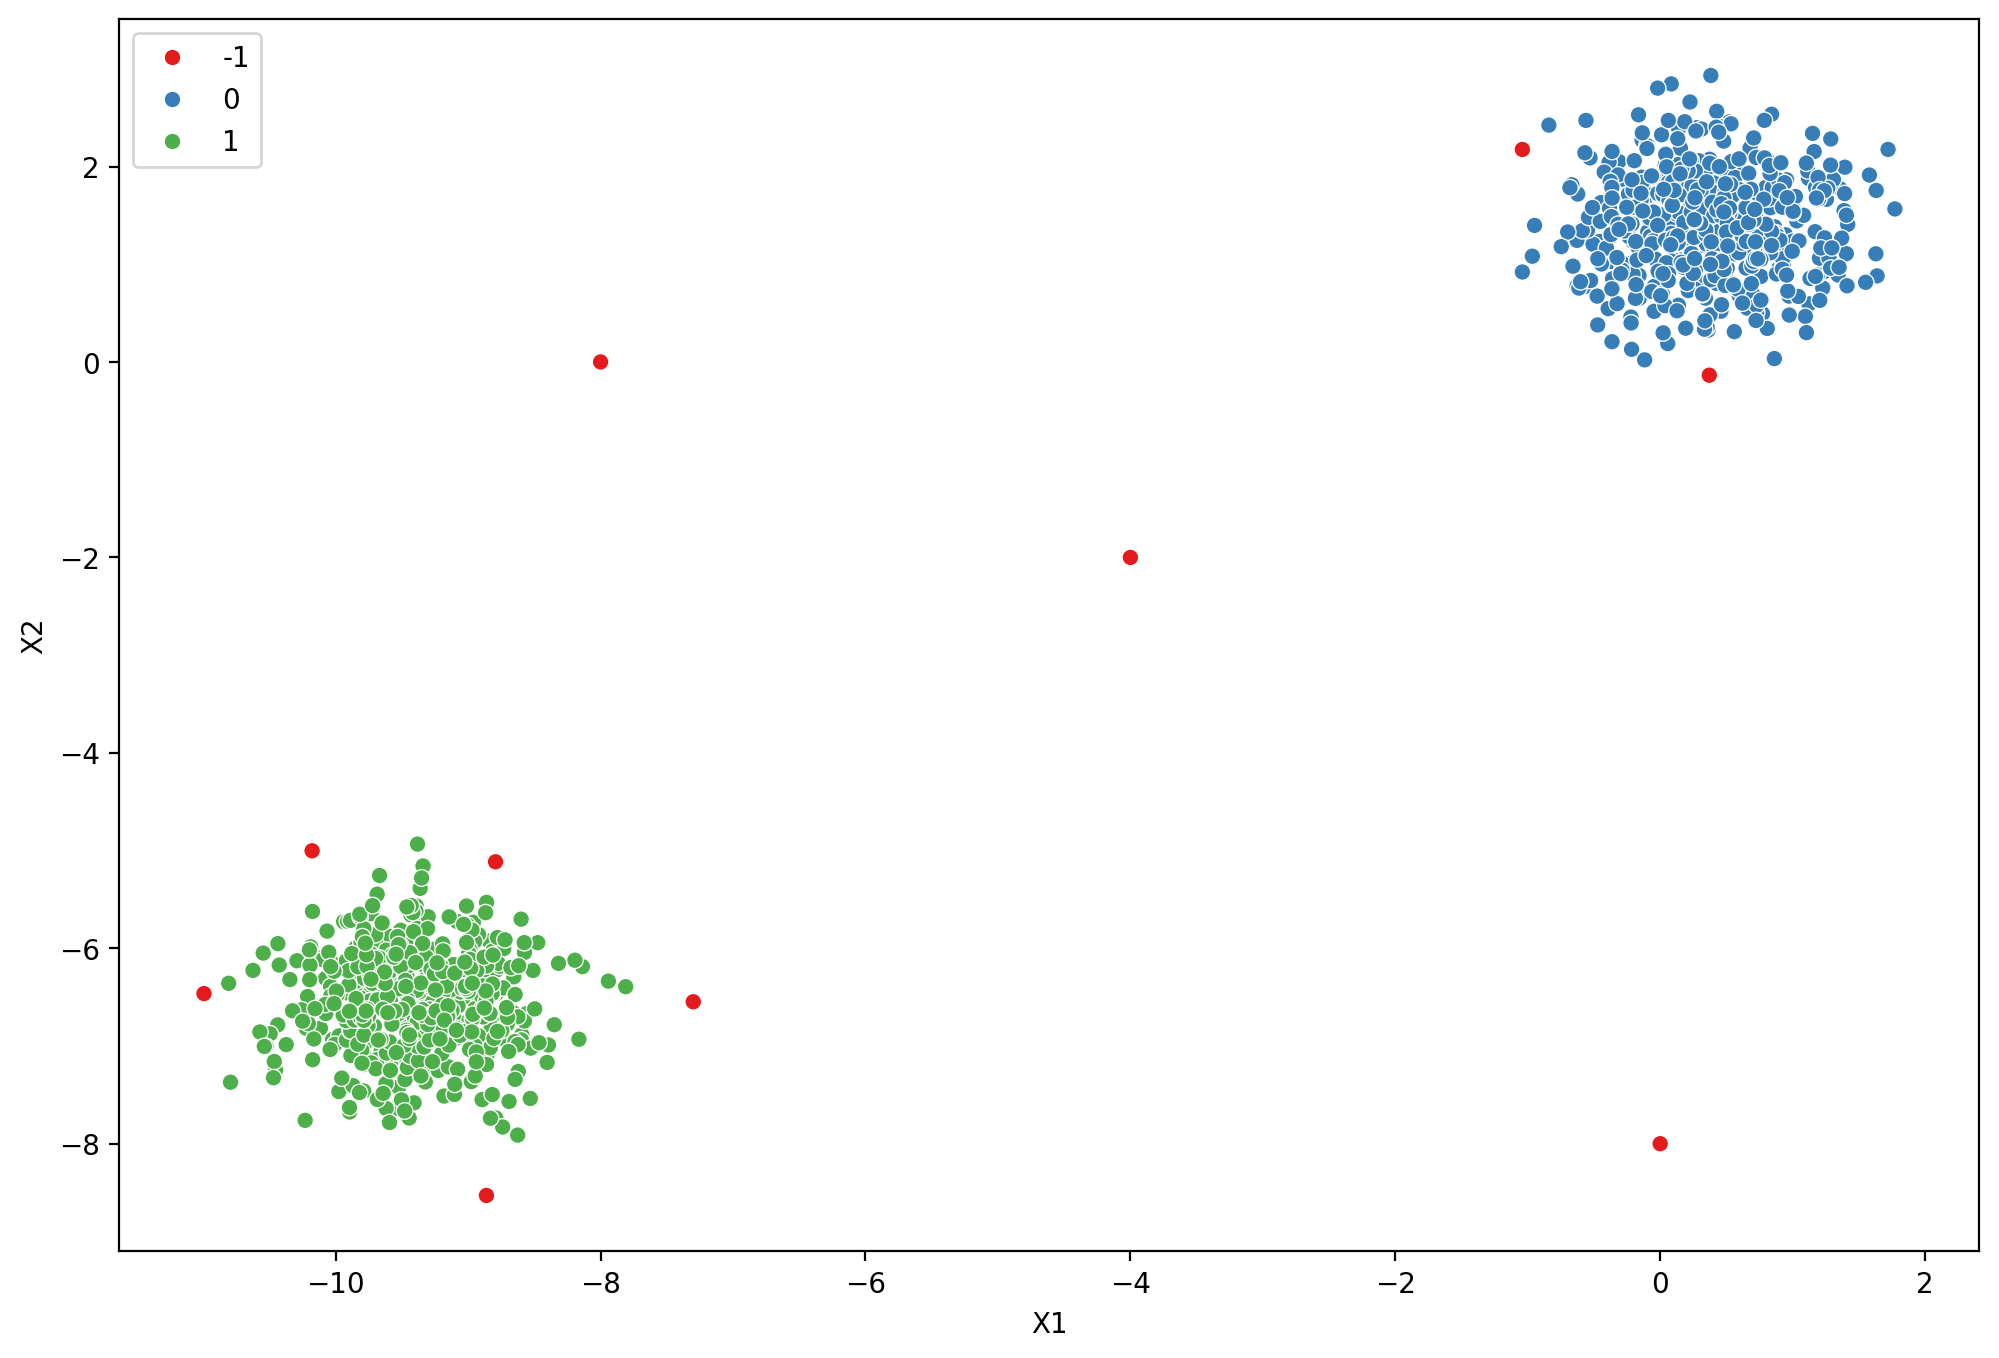

In [99]:
dbscan = DBSCAN(eps=0.4)
display_categories(dbscan, two_blobs_outliers)

## Если мы работаем с количеством выбросов
В этом случае мы можем выбрать некоторое "допустимое" количество точек-выбросов. Например, считаем допустимым 3 выброса.

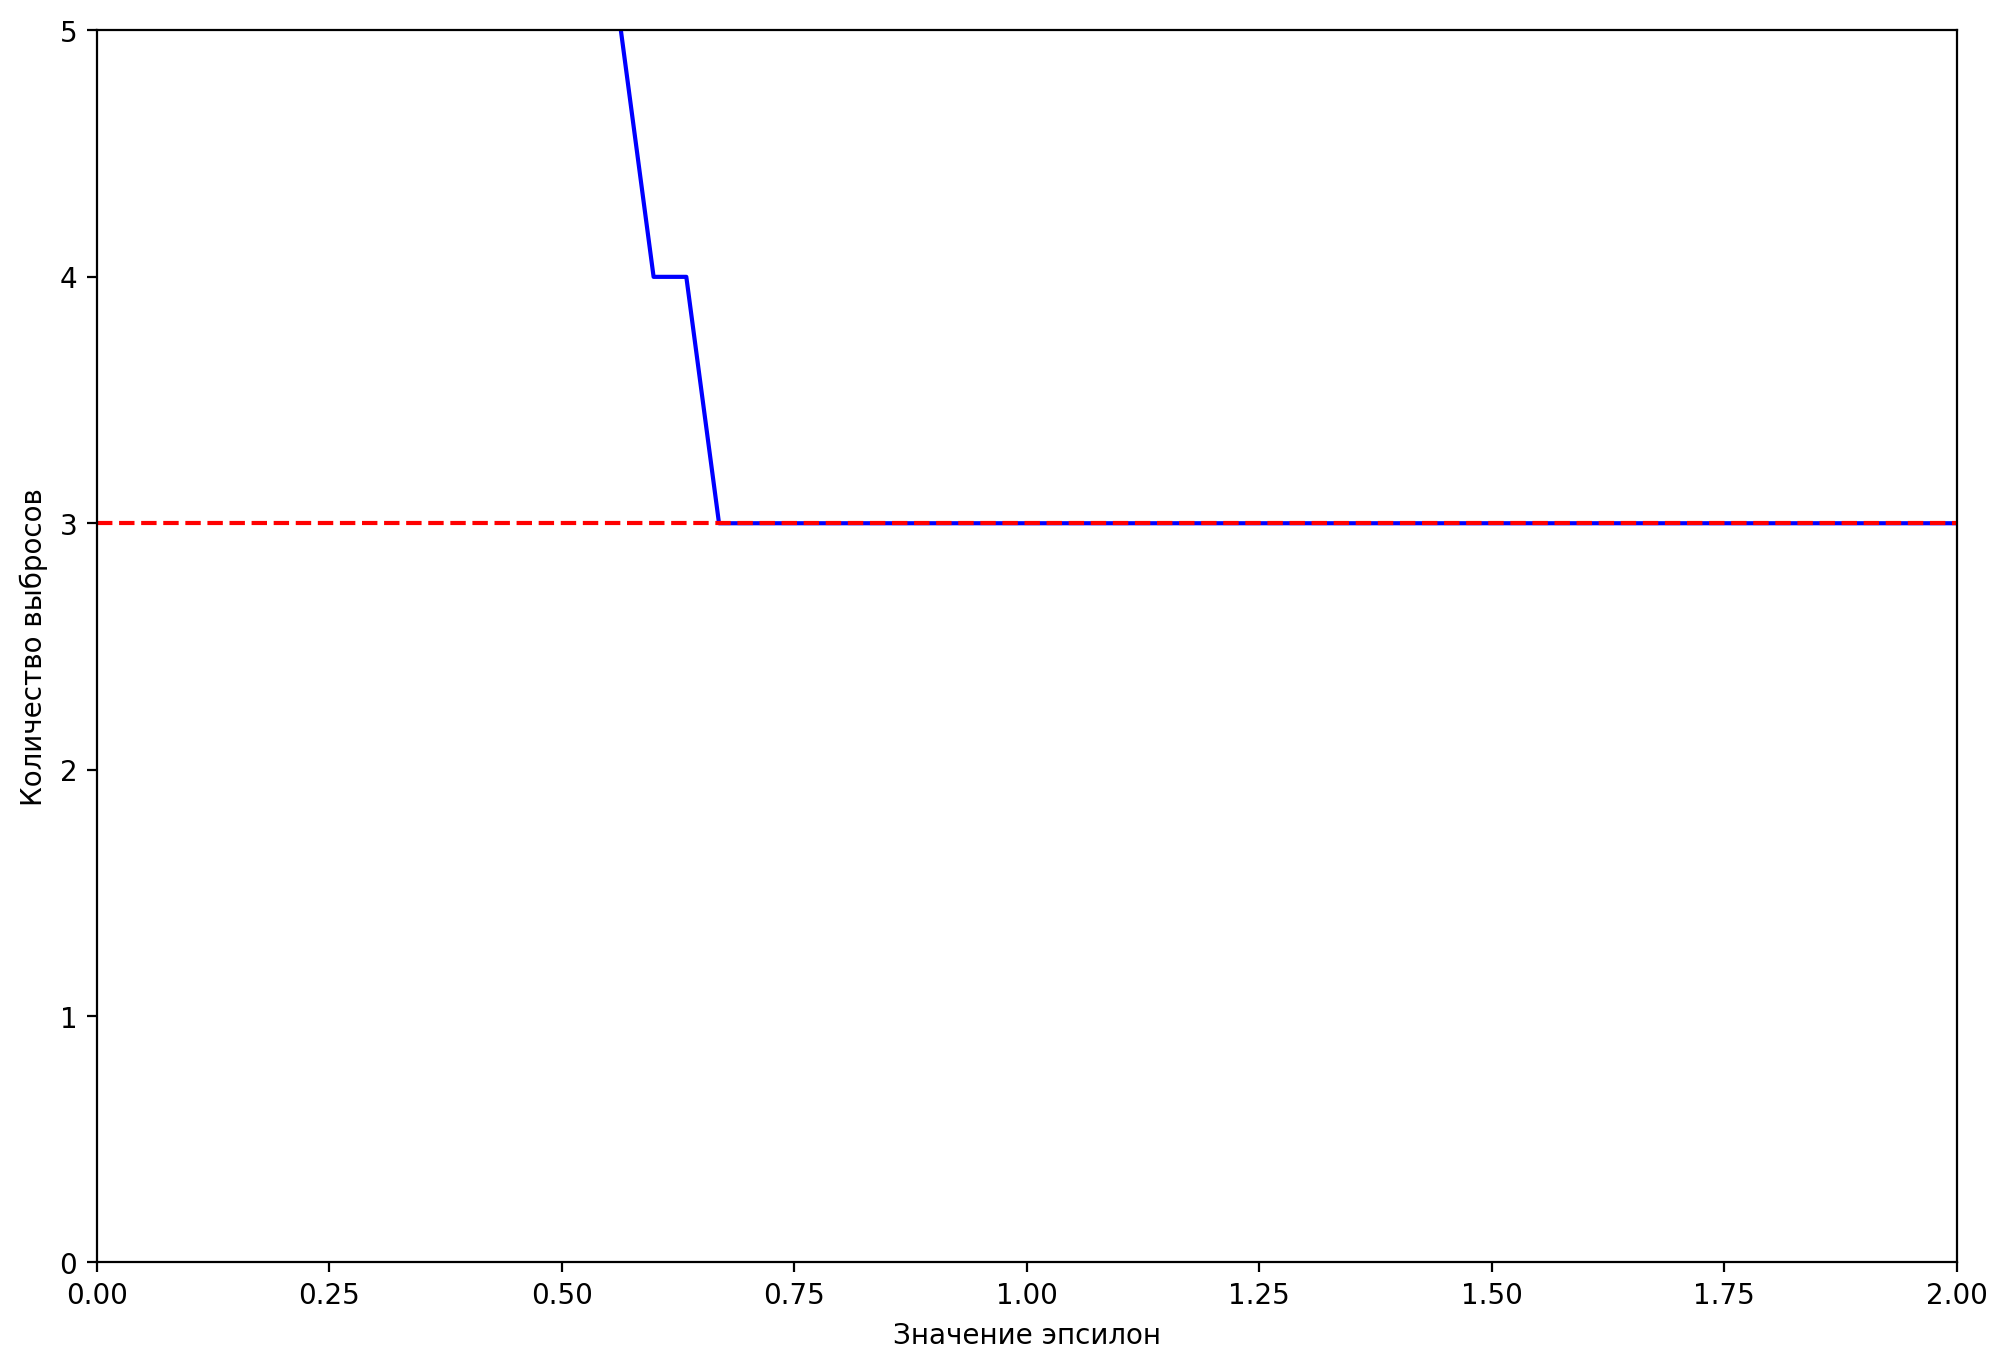

In [95]:
plt.figure(figsize=(12, 8), dpi=200)
sns.lineplot(x=np.linspace(0.001, 7, 200), y=number_of_outliers, c='blue')
plt.xlim(0, 2)
plt.ylim(0, 5)
plt.hlines(y=3, xmin=0, xmax=2, color='red', ls='--')
plt.xlabel('Значение эпсилон')
plt.ylabel('Количество выбросов')
plt.show()

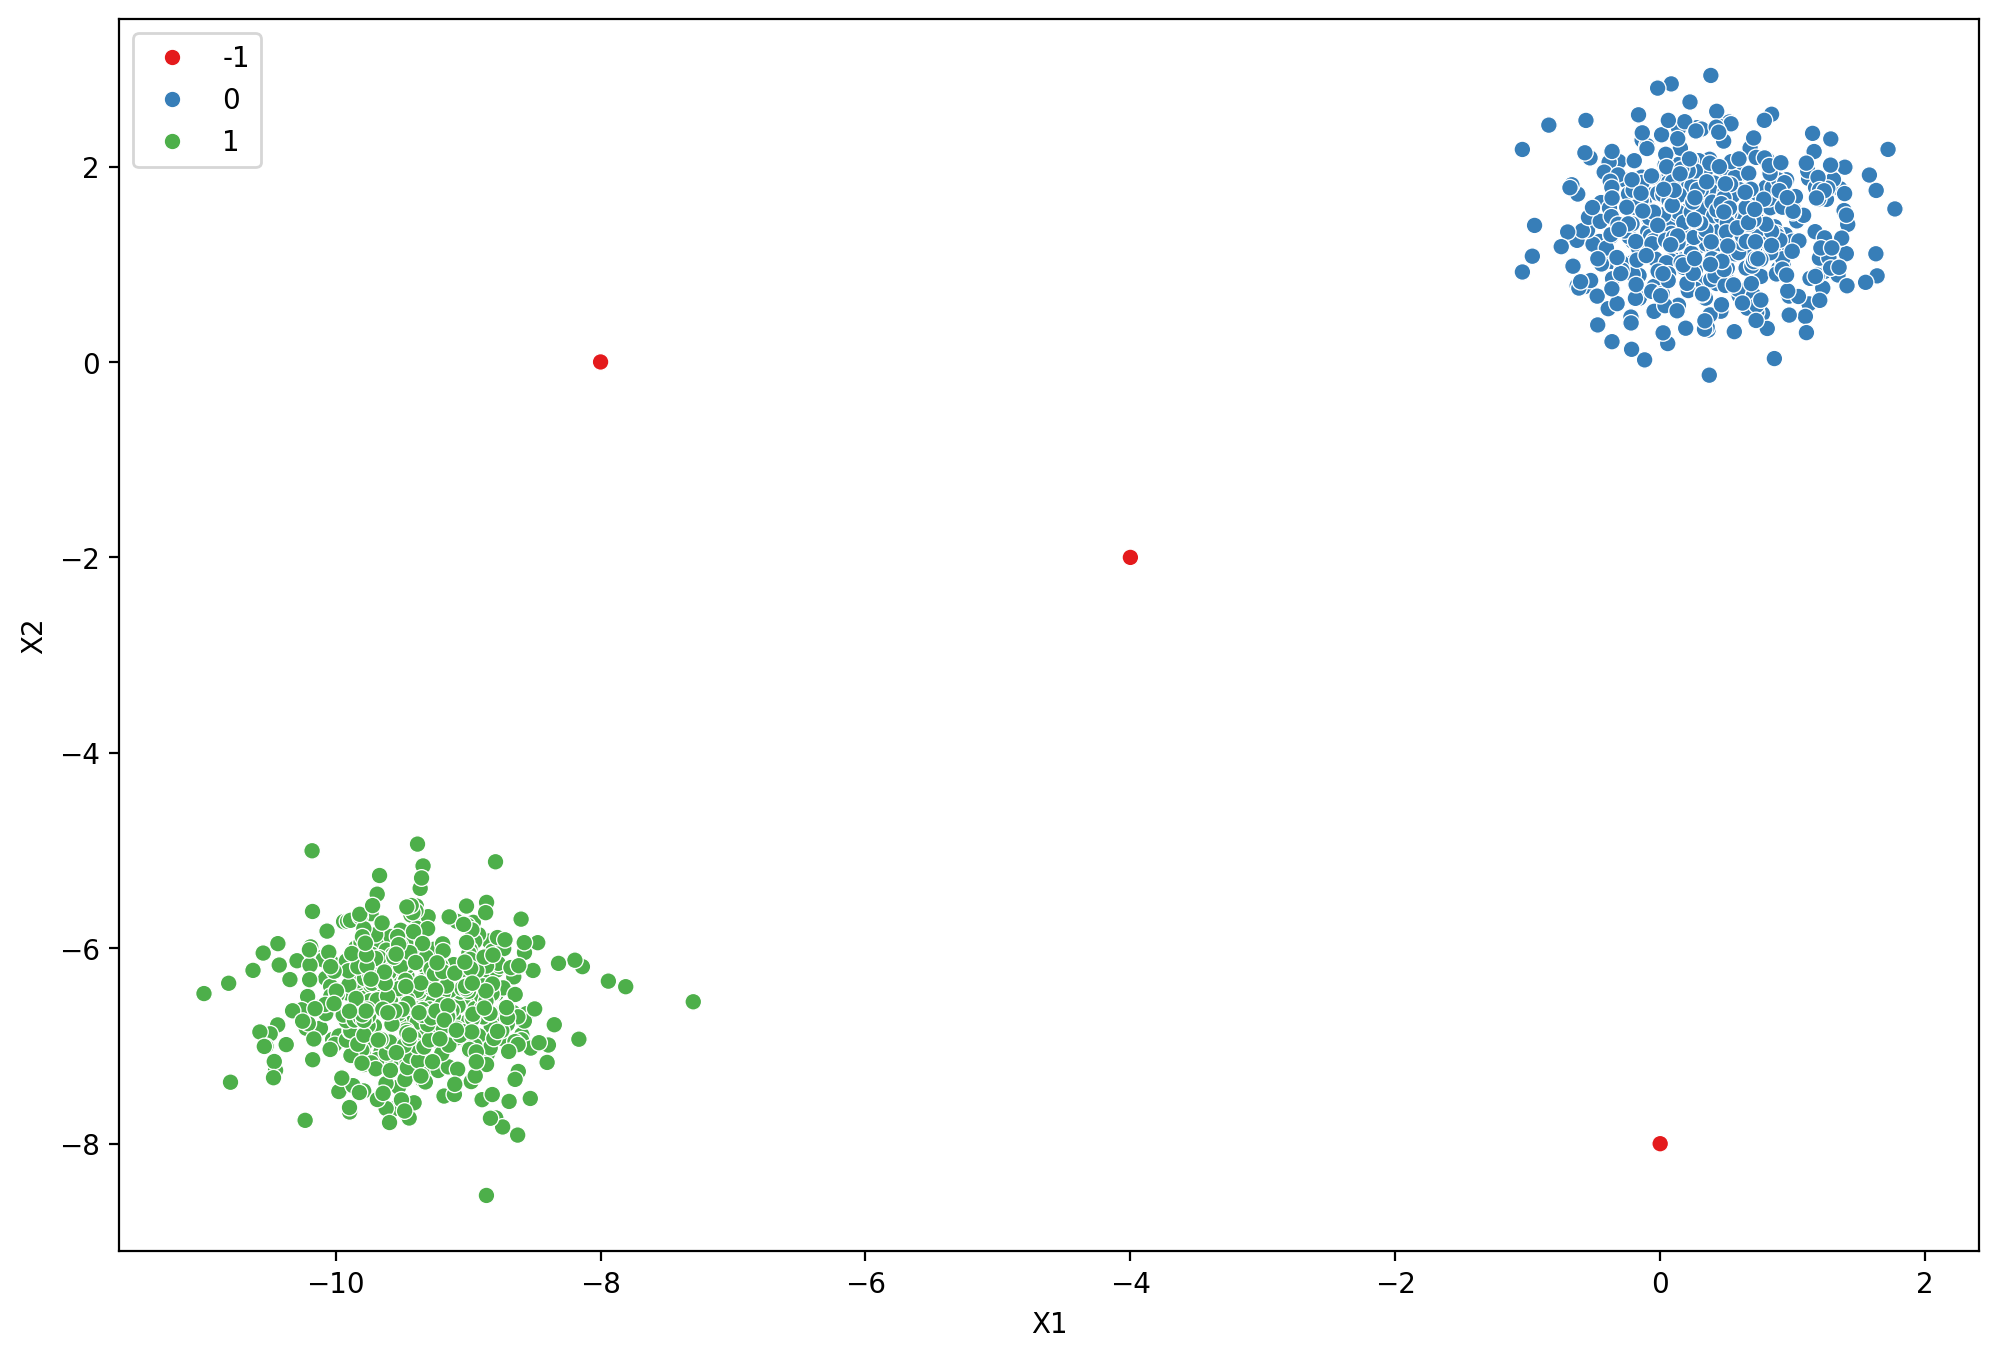

In [101]:
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan, two_blobs_outliers)

# Минимальное количество точек (Minimum Samples)¶
    min_samples : int, default=5
     |      The number of samples (or total weight) in a neighborhood for a point
     |      to be considered as a core point. This includes the point itself.
 
Как можно выбрать минимальное значение точек?

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

In [105]:
outlier_percent = []
number_of_outliers = []

# Здесь, число будет зависеть от общего
# количества точек, а также от того, наскоько 
# эти точки разбросаны
for n in np.arange(1, 100):
    
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)

    # Количество выбросов
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))

    # Процент выбросов
    percent_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(percent_outliers)

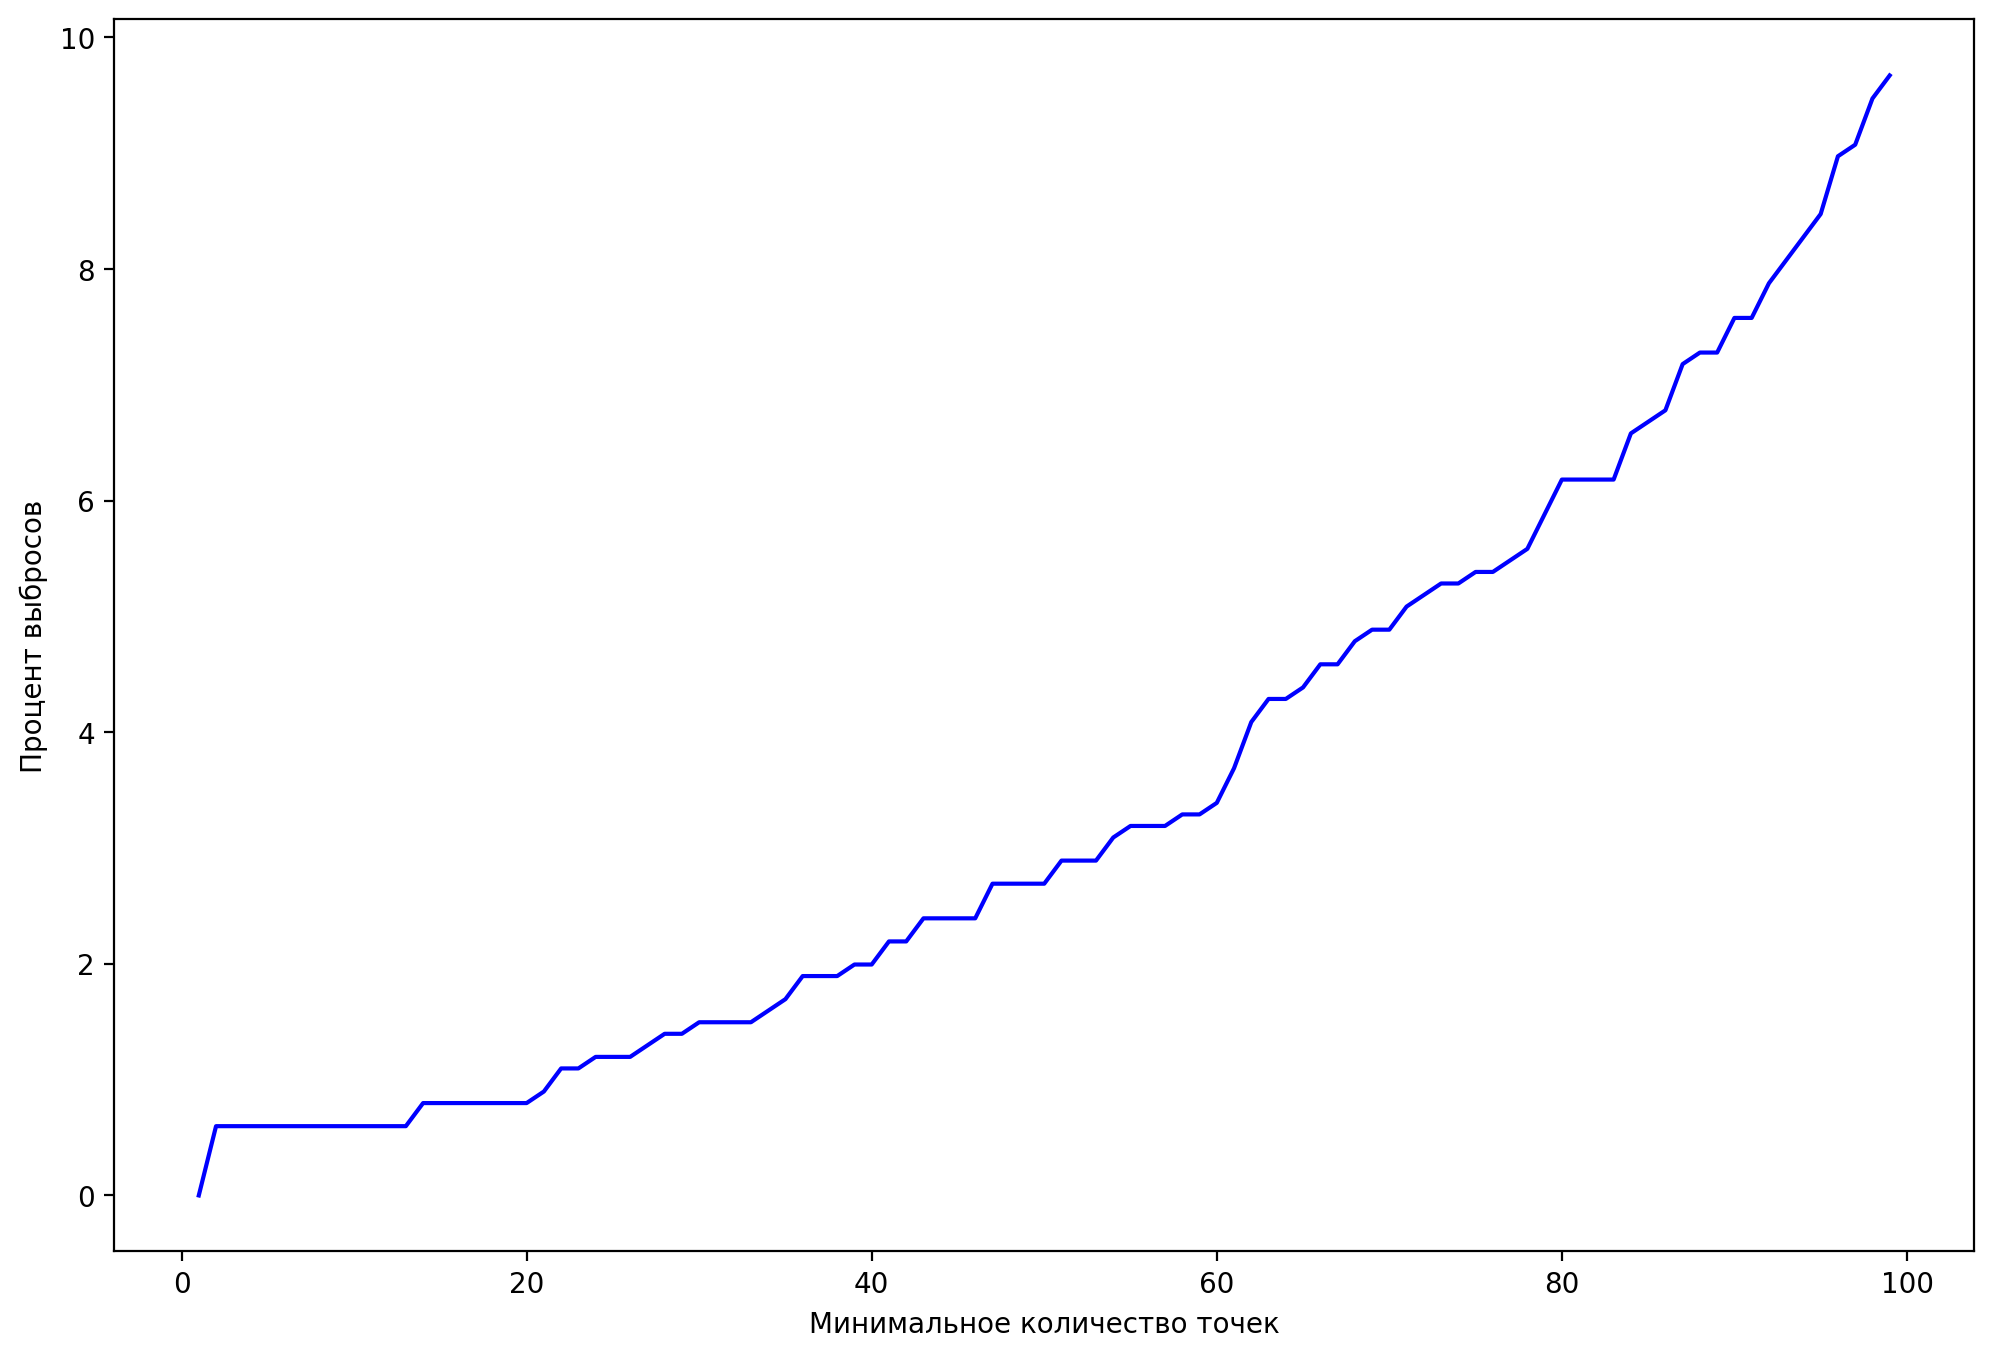

In [109]:
plt.figure(figsize=(12, 8), dpi=200)
sns.lineplot(x=np.arange(1, 100), y=outlier_percent, c='blue')
plt.xlabel('Минимальное количество точек')
plt.ylabel('Процент выбросов')
plt.show()

Видим, что чем больше минимальное количество точек, тем больше точек обозначается как выбросы, потому что всё чаще в окрестности точки недостаточно других точек, чтобы она была обозначена как core.

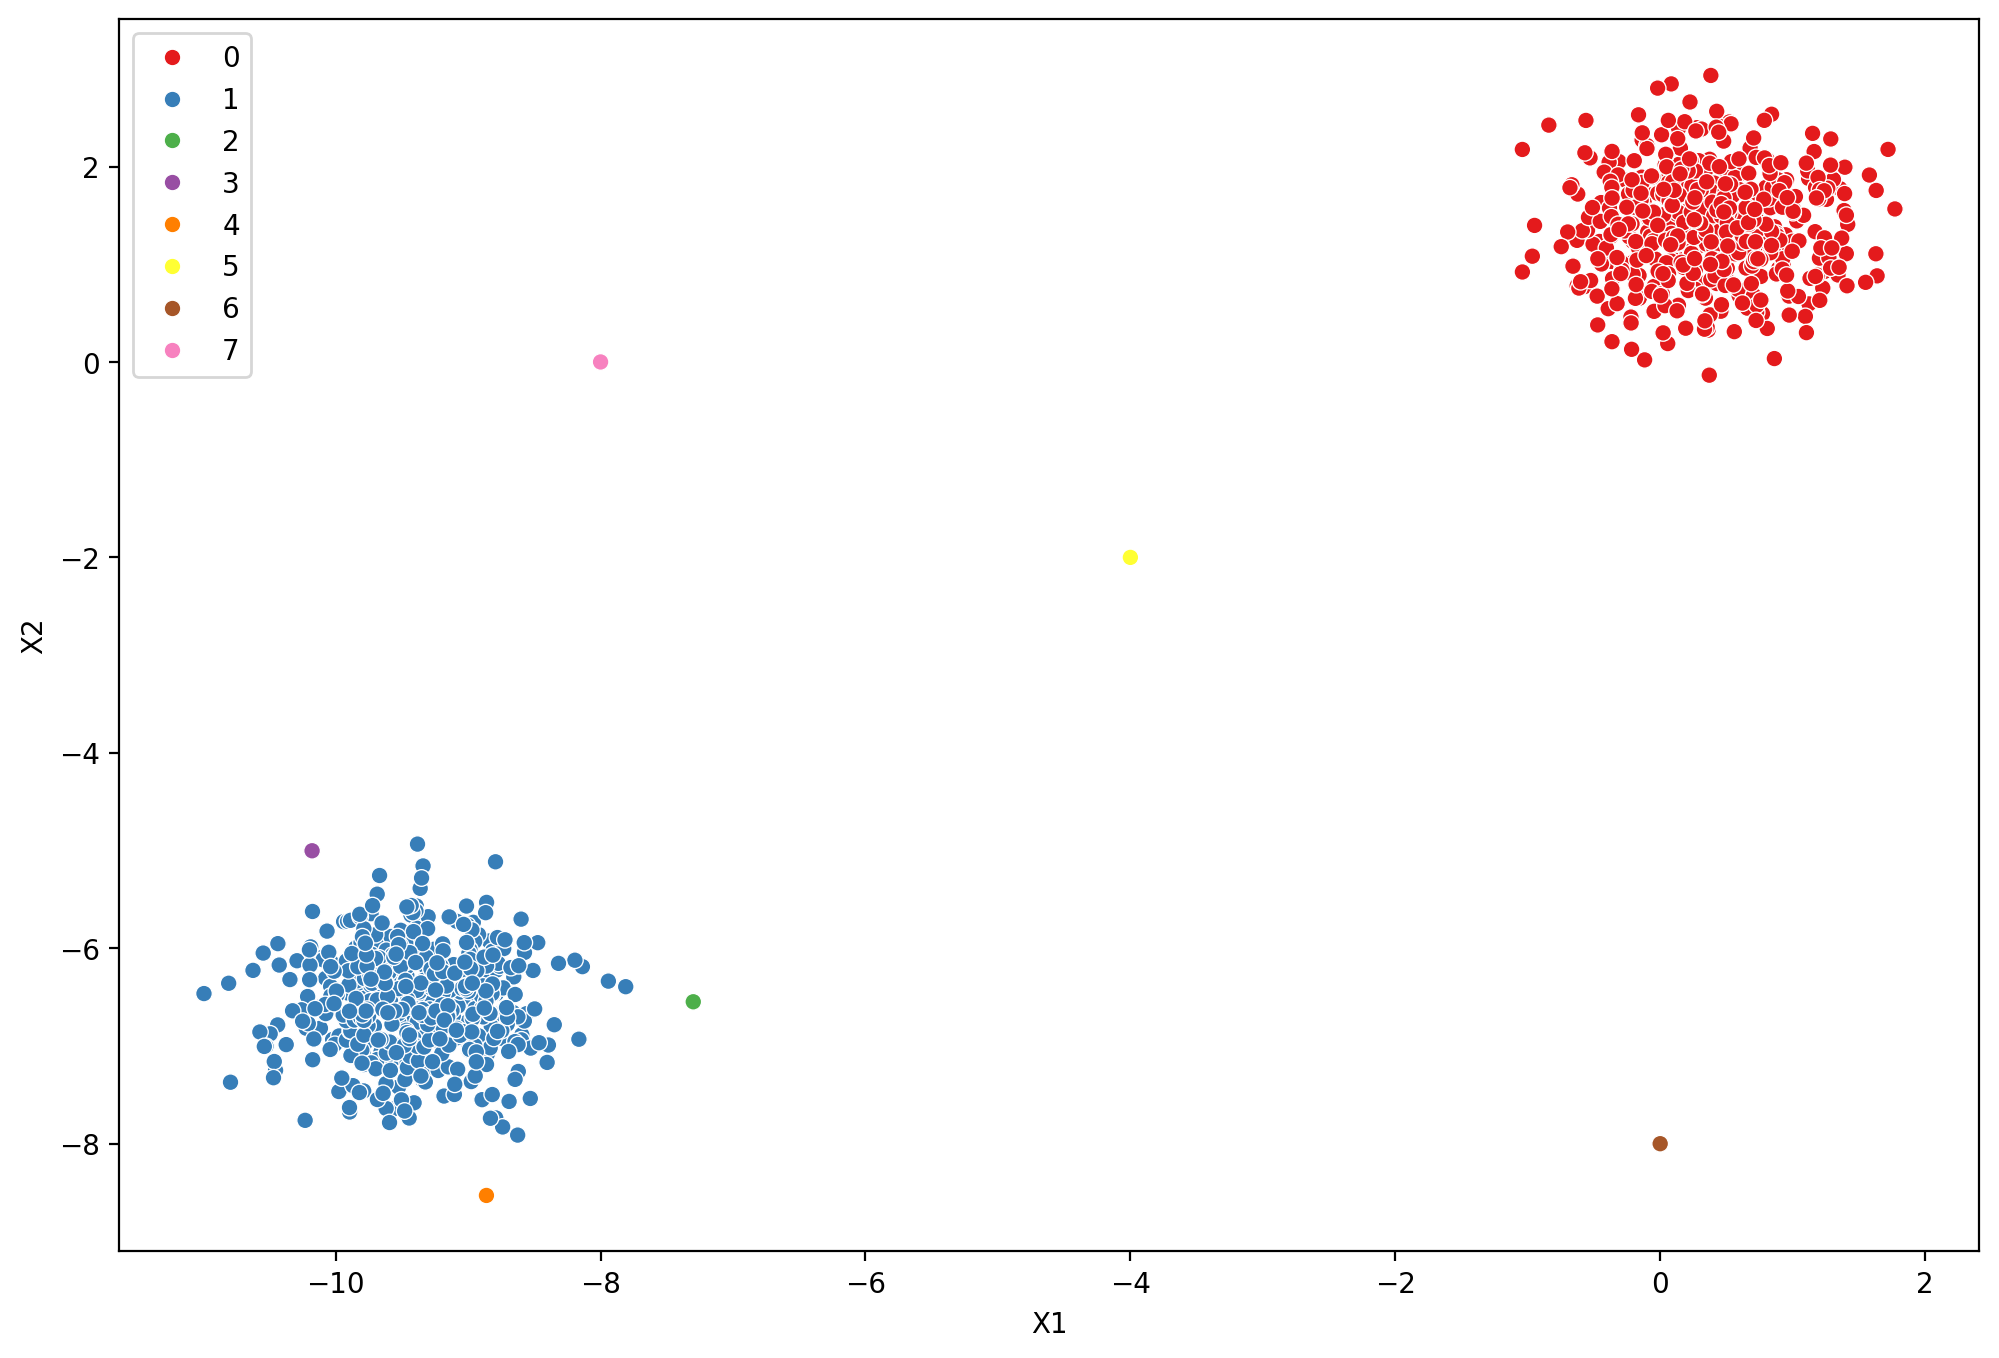

In [112]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan, two_blobs_outliers)

Получаем следующий результат - те шесть точек, которые раньше были выбросами, стали отдельными кластерами. Это произошло из-за того, что когда мы считаем количество точек в окрестности, то сама точка тоже считается, поэтому для `min_samples=1` - не получатся выбросы. Каждая точка будет либо в каком-то общем кластере, либо сама точка будет отдельным кластером.

Это может пригодиться, если вместо выбросов нужны отдельные кластеры.

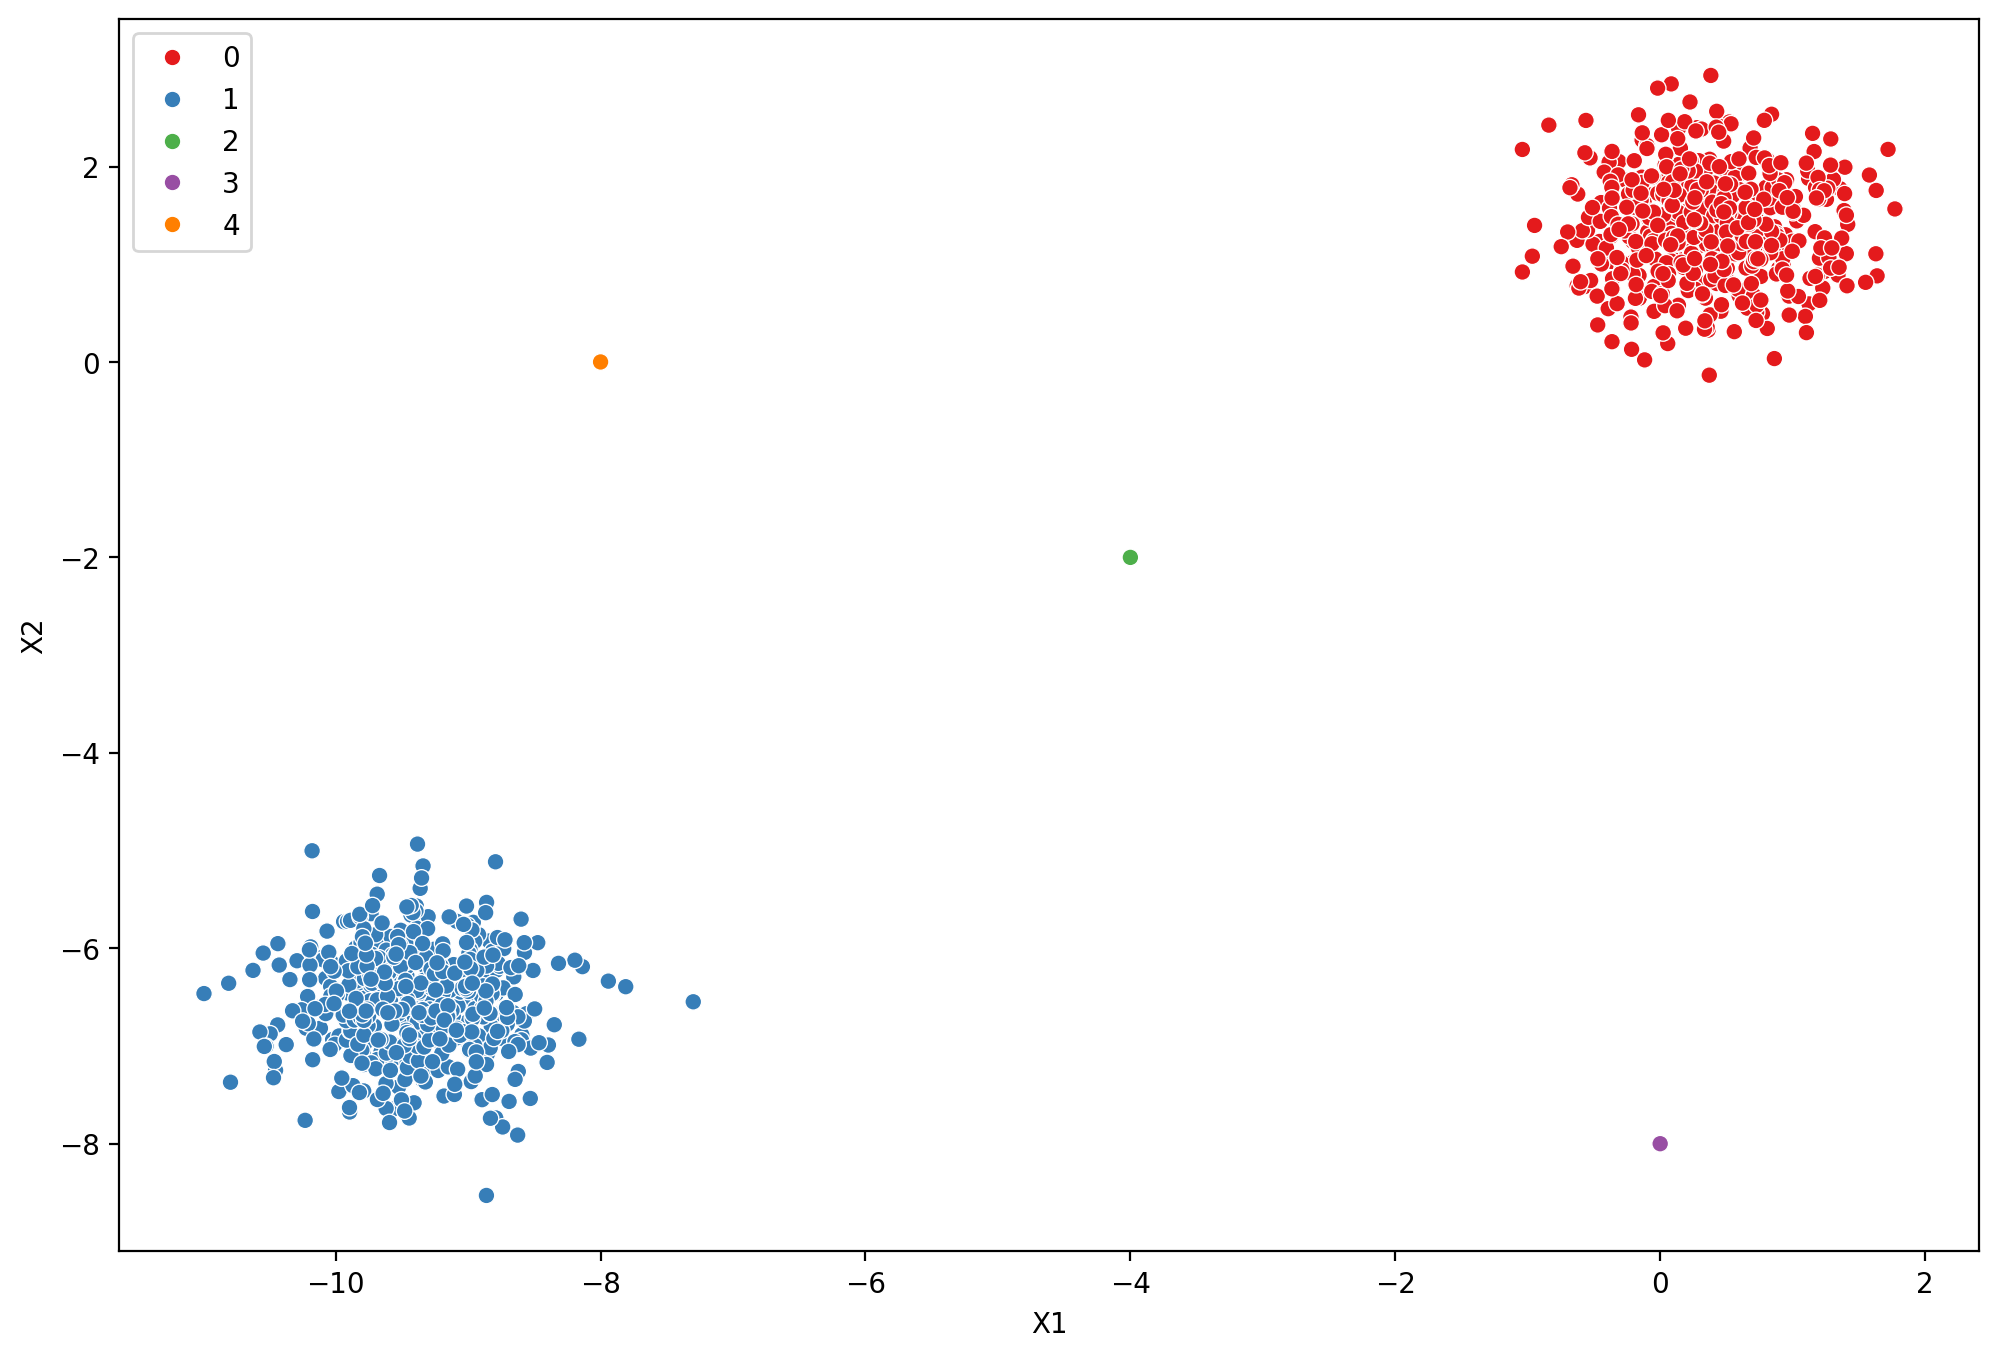

In [115]:
dbscan = DBSCAN(min_samples=1, eps=0.75)
display_categories(dbscan, two_blobs_outliers)

В качестве хорошего начального значения для данного параметра можно взять 2*количество_измерений.

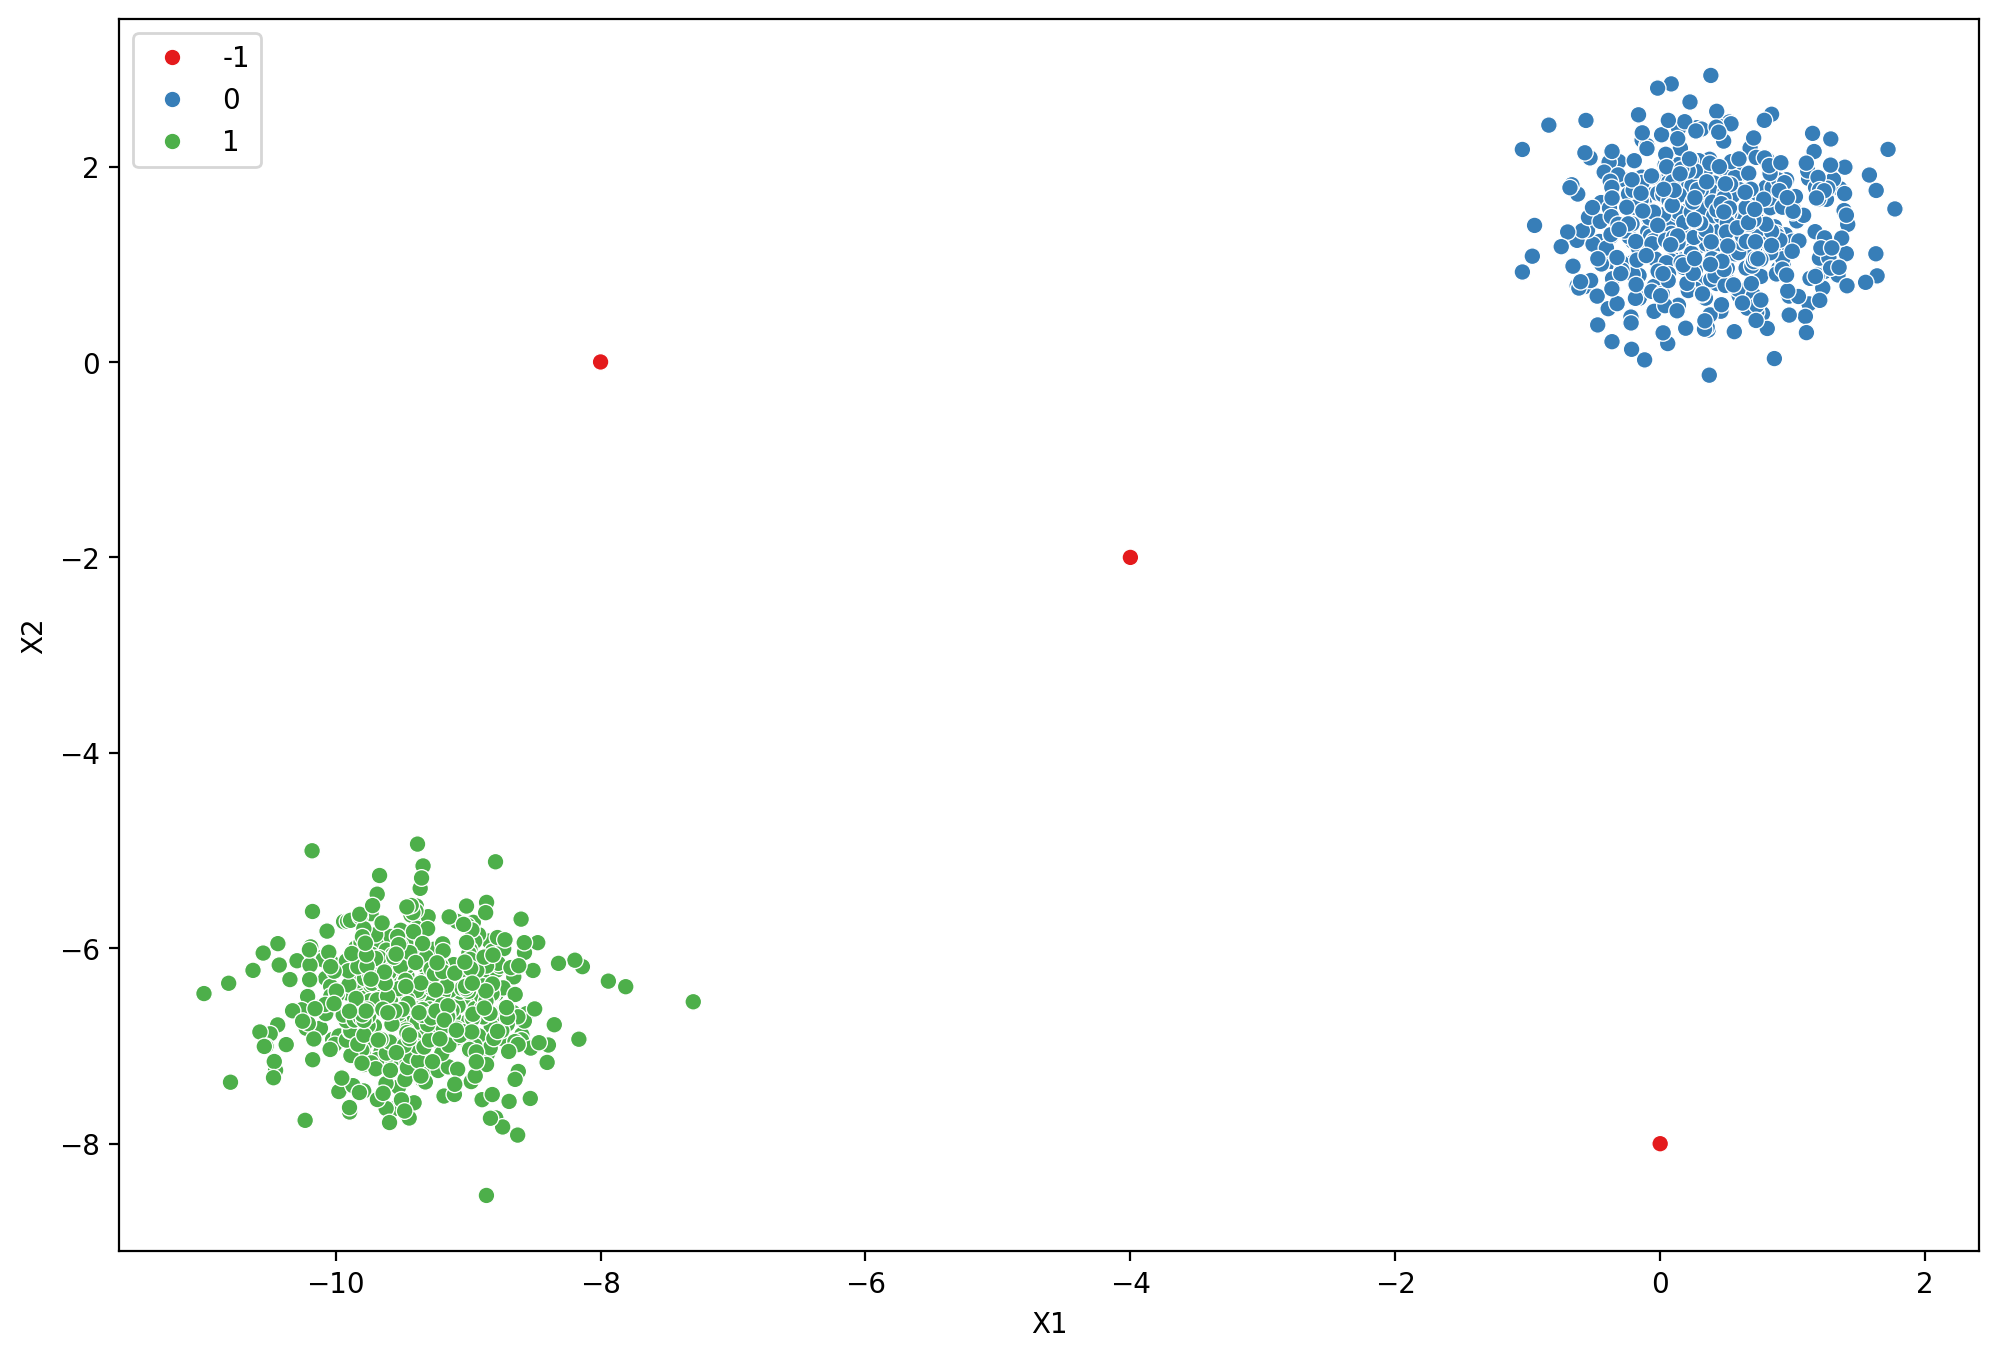

In [118]:
# Количество колонок, а количество колонок - количество измерений
number_of_dimensions = two_blobs_outliers.shape[1]

dbscan = DBSCAN(min_samples=2*number_of_dimensions, eps=0.75)
display_categories(dbscan, two_blobs_outliers)